In [5]:
from matplotlib import pyplot as plt
import csv
import pickle
import matplotlib
import re
from math import sqrt
import numpy as np
from scipy.optimize import curve_fit
from scipy import interpolate
import sys
import xlrd
sys.path.insert(0, './')
sys.path.insert(0, '../')
from analyze_asiii import *
%matplotlib notebook

In [6]:
# imports calibration curve stuff

num_cols = 12
num_rows = 8

nm_start = 400
nm_step = 10
nm_end = 700
nms = np.arange(nm_start,nm_end + nm_step,nm_step)

blanks = 'Blanks.txt'
adds = ['Add.txt', 'Add2.txt']

# reads all the data
wells_blanks = read_file(blanks, num_cols, nm_start, nm_end, nm_step)

all_wells_adds = []

for file in adds:
    wells_add = read_file(file, num_cols, nm_start, nm_end, nm_step)

    # subtracts blanks from arsenazo data
    for well in wells_add:
        wells_add[well] -= wells_blanks[well]
        
    all_wells_adds.append(wells_add)
    
rees = ['La','Eu','Yb']
la_concs = np.arange(0,40,1.25)

<IPython.core.display.Javascript object>


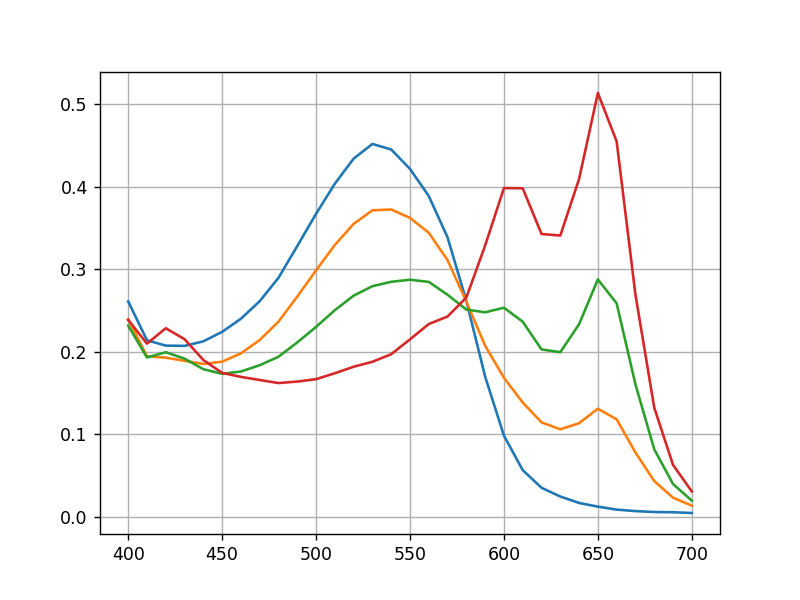

<IPython.core.display.Javascript object>


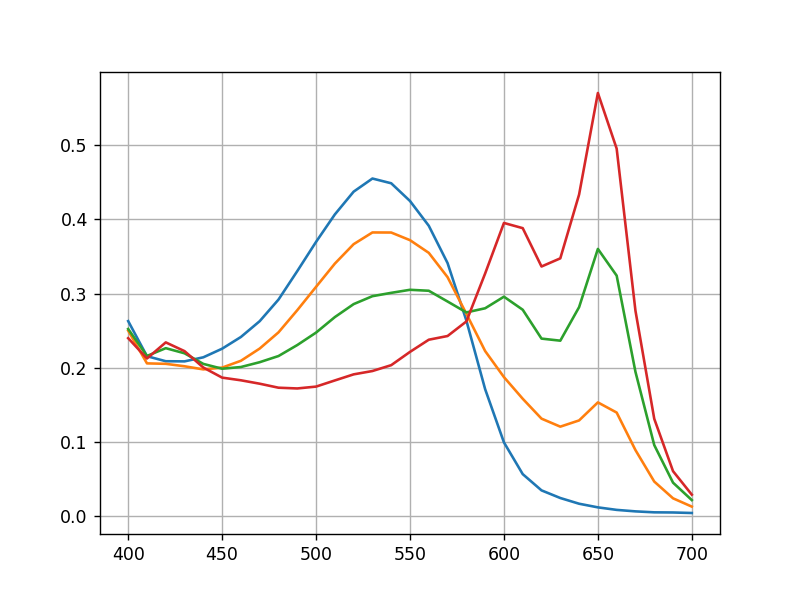

<IPython.core.display.Javascript object>


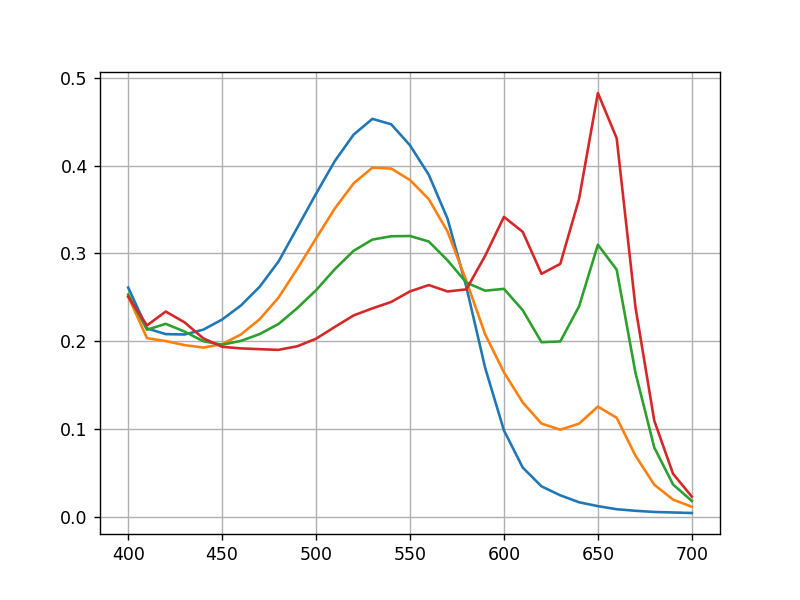

In [7]:
# plots secect calibration curve points for all wavelengths for each REE
idxes = [0, 4, 8, 16]
labs = ['0 $\mu$M', '4 $\mu$M','8 $\mu$M','16 $\mu$M']
for j in range(3):
    plt.figure()
    for i in idxes:
        plt.plot(nms, all_wells_adds[1][i%8+1,i // 8 + 1 + 4*j])
    plt.legend()
    plt.grid()

<IPython.core.display.Javascript object>


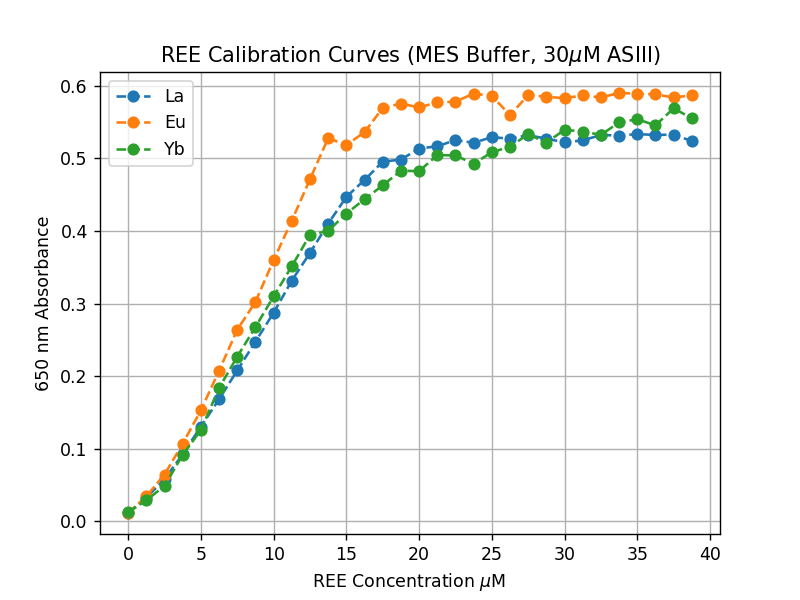

In [8]:
# plots calibratoin curves for all REEs on one graph

la_concs = np.arange(0,40,1.25)
wave = (650 - nm_start) // nm_step
plt.figure()
plt.rcParams['pdf.fonttype'] = 42
for j in range(3):
    for wells_add in all_wells_adds[1:]:
            abses = []
            for i in range(len(la_concs)):
                r = i % 8 + 1
                c= i // 8 + 1
                abses.append(wells_add[(r,c + 4*j)][wave])
            plt.plot(la_concs, abses, 'o--')
plt.legend(['La','Eu','Yb'])
plt.title('REE Calibration Curves (MES Buffer, 30$\mu$M ASIII)')
plt.xlabel('REE Concentration $\mu$M ')
plt.ylabel('650 nm Absorbance')
plt.grid()
plt.savefig('Fig2B.pdf')

<IPython.core.display.Javascript object>


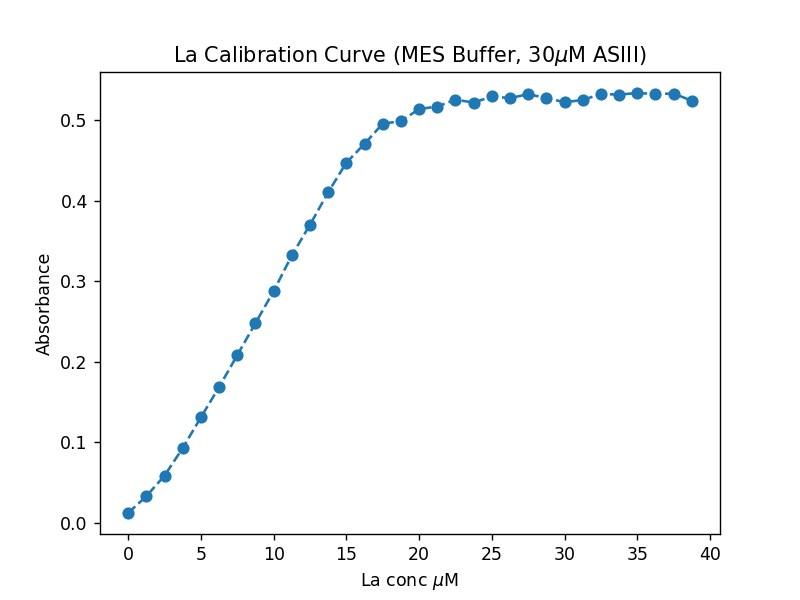

<IPython.core.display.Javascript object>


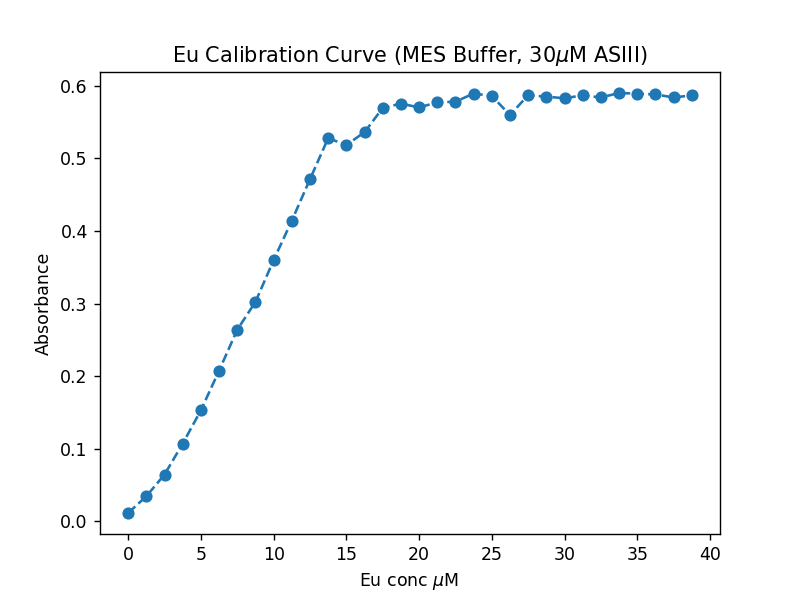

<IPython.core.display.Javascript object>


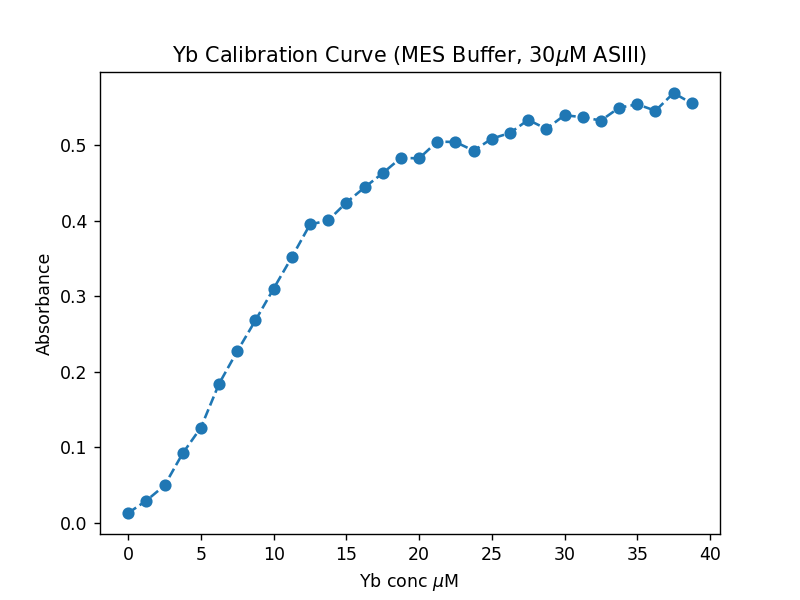

In [9]:
# plots absorbance (mean,std) vs REE for a particular wavelength for all times

la_concs = np.arange(0,40,1.25)
wave = (650 - nm_start) // nm_step
for j in range(3):
    plt.figure()
    for wells_add in all_wells_adds[1:]:
            abses = []
            for i in range(len(la_concs)):
                r = i % 8 + 1
                c= i // 8 + 1
                abses.append(wells_add[(r,c + 4*j)][wave])
            plt.plot(la_concs, abses, 'o--')
    #plt.legend(['1','2'])
    plt.title(rees[j] + ' Calibration Curve (MES Buffer, 30$\mu$M ASIII)')
    plt.xlabel(rees[j] + ' conc $\mu$M ')
    plt.ylabel('Absorbance')


<IPython.core.display.Javascript object>


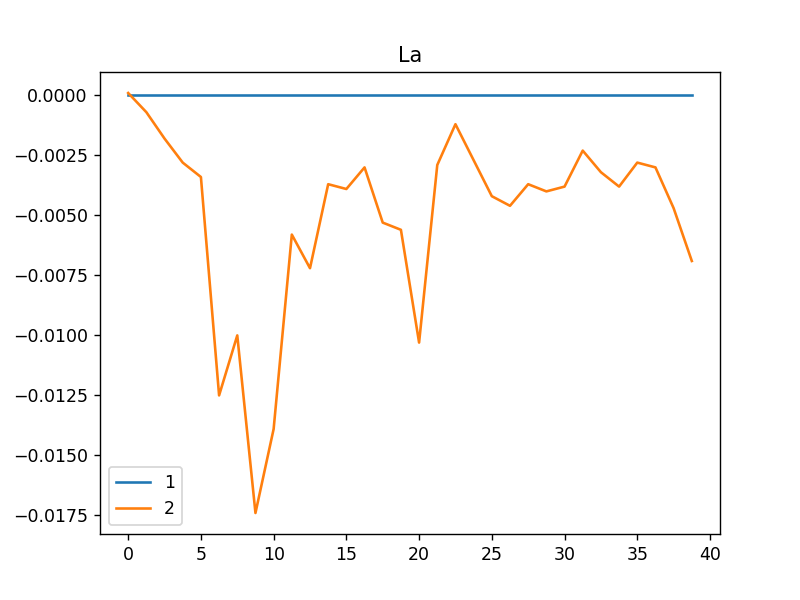

<IPython.core.display.Javascript object>


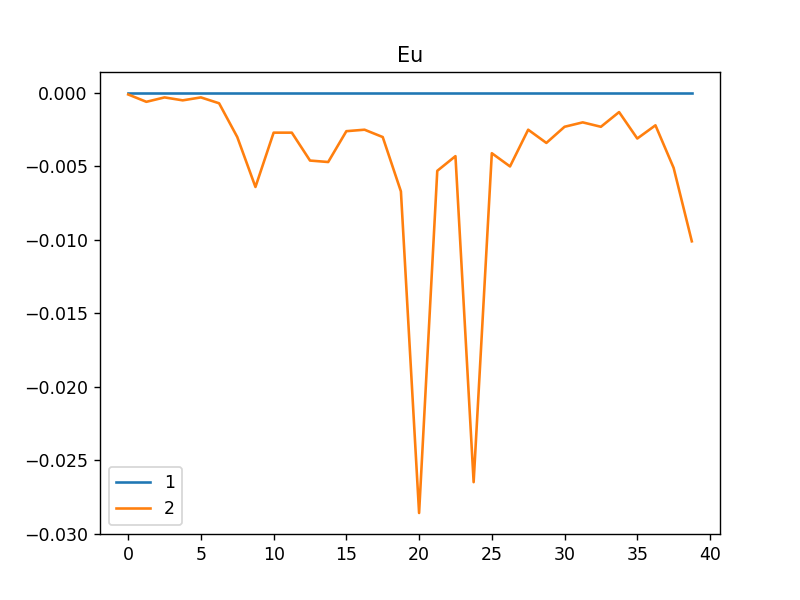

<IPython.core.display.Javascript object>


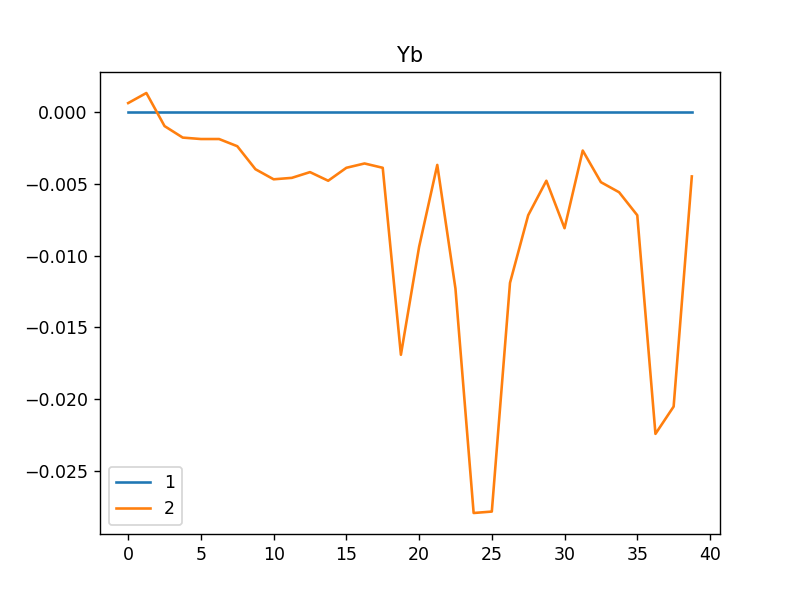

In [10]:
# plots difference from original 

la_concs = np.arange(0,40,1.25)
wave = (650 - nm_start) // nm_step
for j in range(3):
    plt.figure()
    for wells_add in all_wells_adds:
            abses = []
            for i in range(len(la_concs)):
                r = i % 8 + 1
                c= i // 8 + 1
                abses.append(wells_add[(r,c + 4*j)][wave] - all_wells_adds[0][(r,c + 4*j)][wave])
            plt.plot(la_concs, abses)
    plt.legend(['1','2'])
    plt.title(rees[j])


<IPython.core.display.Javascript object>


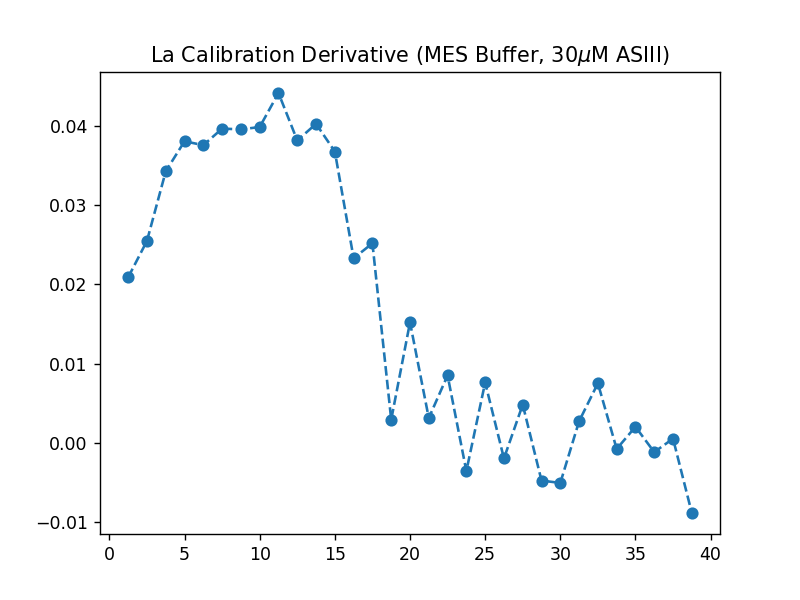

<IPython.core.display.Javascript object>


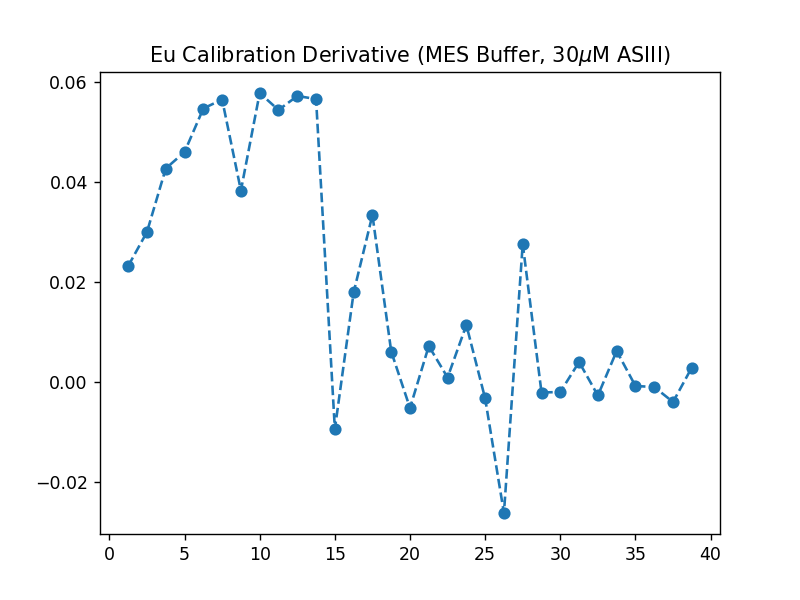

<IPython.core.display.Javascript object>


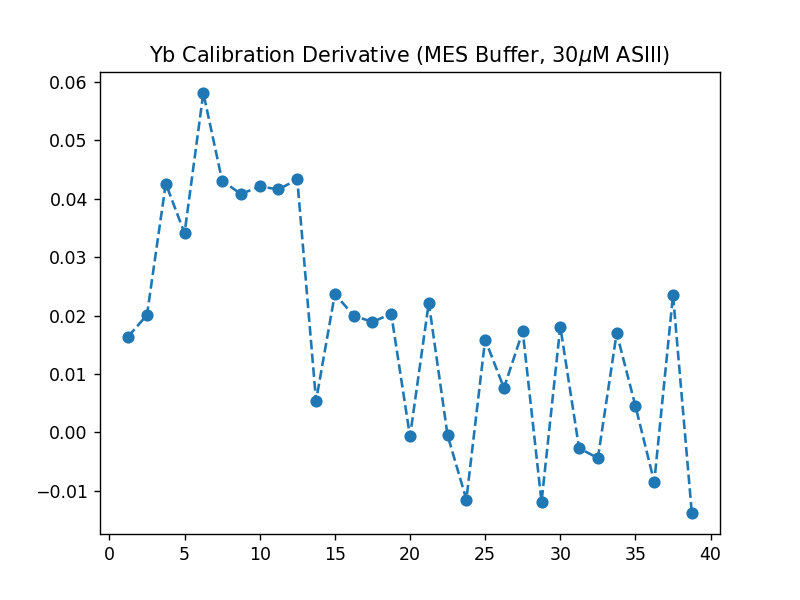

In [11]:
# plots slope over ree conc

la_concs = np.arange(0,40,1.25)
wave = (650 - nm_start) // nm_step
for j in range(3):
    plt.figure()
    for wells_add in all_wells_adds[1:]:
            abses = []
            for i in range(len(la_concs) - 1):
                r = i % 8 + 1
                c= i // 8 + 1
                r2 = (i+1) % 8 + 1
                c2 = (i+1) // 8 + 1
                abses.append(wells_add[(r2,c2 + 4*j)][wave] - wells_add[(r,c + 4*j)][wave])
            plt.plot(la_concs[1:], abses, 'o--')
    #plt.legend(['1','2'])
    plt.title(rees[j] + ' Calibration Derivative (MES Buffer, 30$\mu$M ASIII)')

<IPython.core.display.Javascript object>


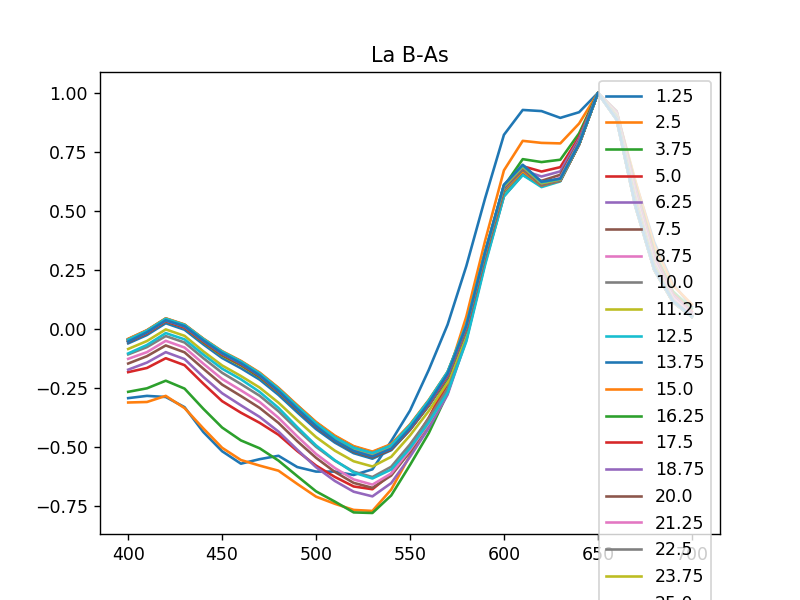

<IPython.core.display.Javascript object>


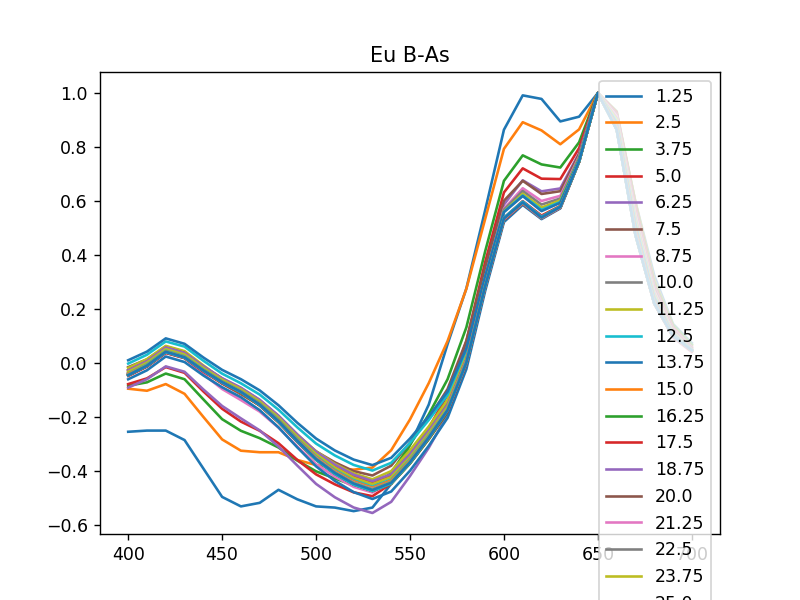

<IPython.core.display.Javascript object>


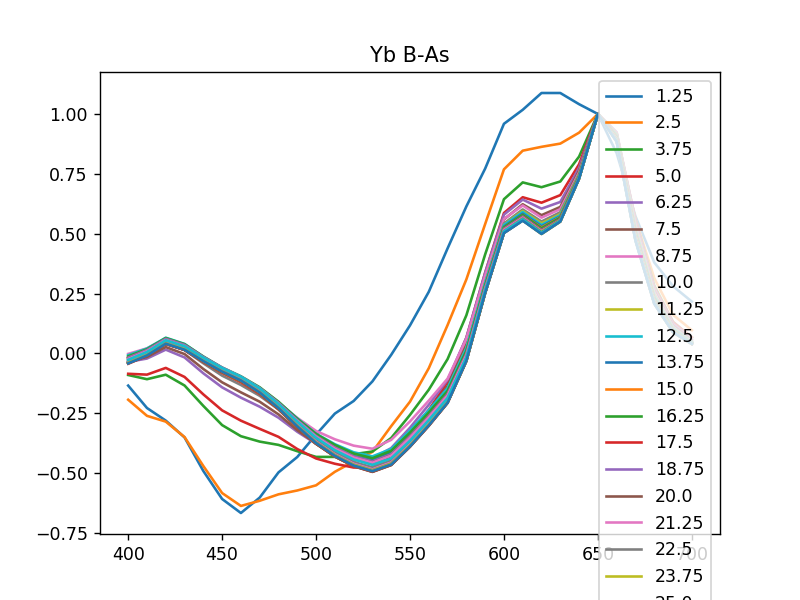

In [12]:
# plots B-As 

for j in range(3):
    for wells_add in all_wells_adds[1:]:
        plt.figure()
        for i in range(1,len(la_concs)):
            r = i % 8 + 1
            c= i // 8 + 1
            vals = wells_add[(r,c+4*j)] - wells_add[(1,1)]
            vals = vals / vals[(650 - nm_start) // nm_step]
            plt.plot(nms, vals)
        plt.legend(list(map(str, la_concs[1:])))
        plt.title(rees[j] + ' B-As')

C:\Users\seanm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


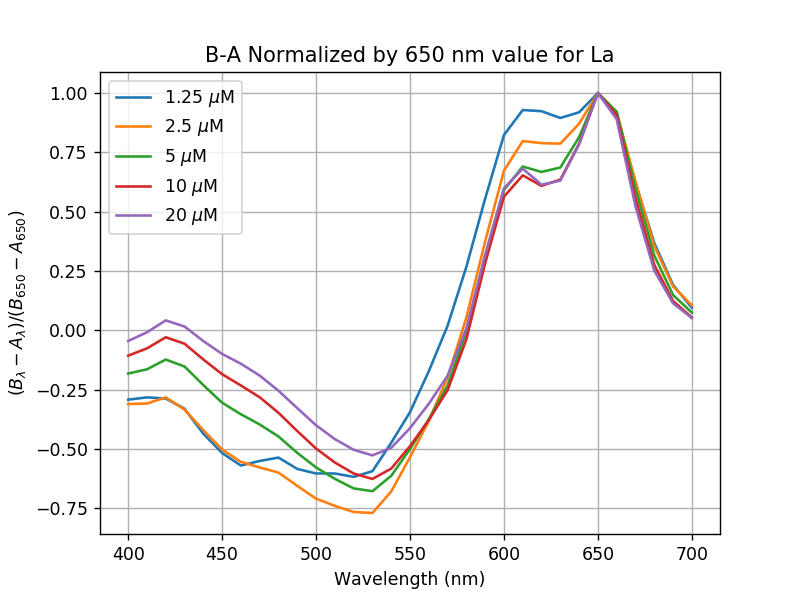

<IPython.core.display.Javascript object>


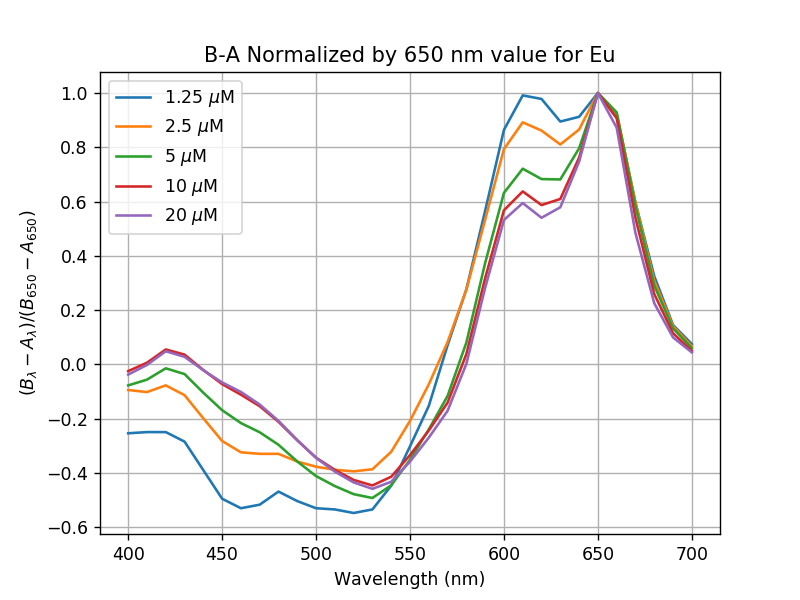

<IPython.core.display.Javascript object>


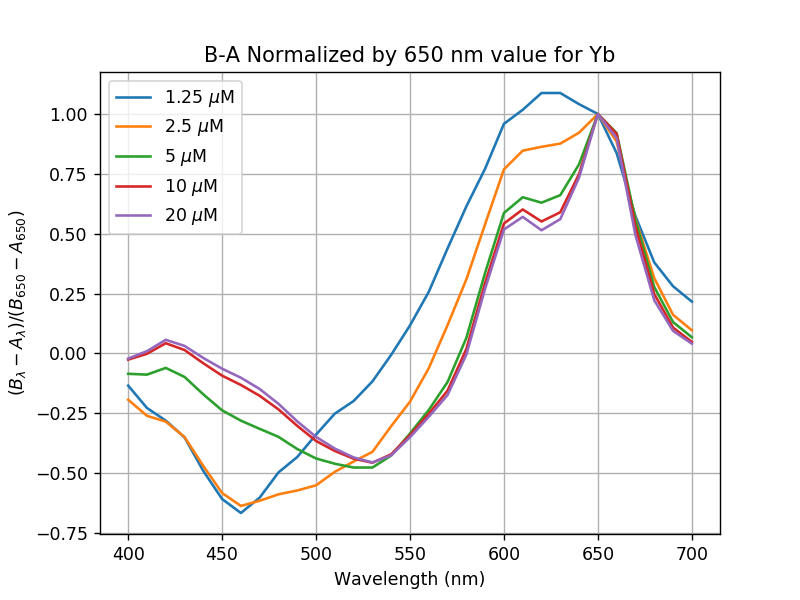

<IPython.core.display.Javascript object>


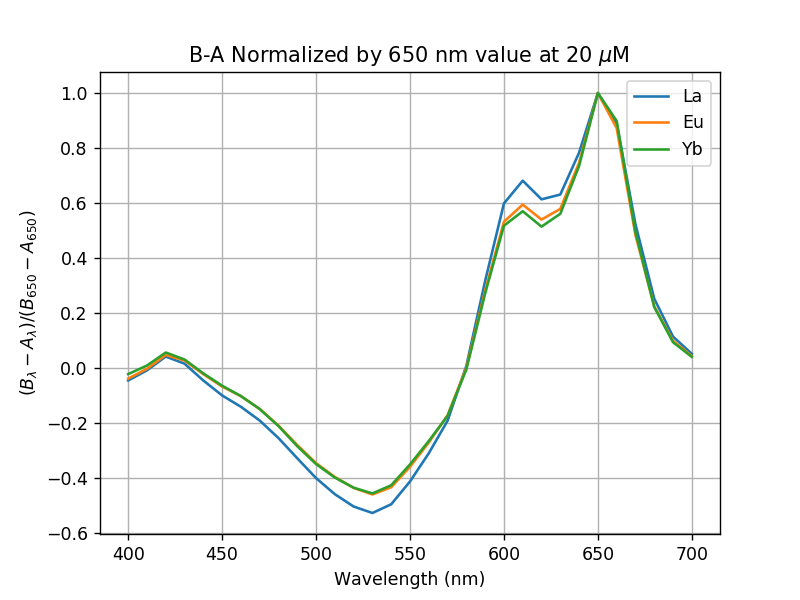

In [19]:
# plots B-A for 1.25, 2.5, 5, 10 for all REEs

for j in range(3):
    for wells_add in all_wells_adds[1:]:
        plt.figure()
        plt.rcParams['pdf.fonttype'] = 42
        for i in [1,2,4,8,16]:
            r = i % 8 + 1
            c= i // 8 + 1
            vals = wells_add[(r,c+4*j)] - wells_add[(1,1)]
            vals = vals / vals[(650 - nm_start) // nm_step]
            plt.plot(nms, vals)
        plt.legend(['1.25 $\mu$M', '2.5 $\mu$M', '5 $\mu$M', '10 $\mu$M', '20 $\mu$M'])
        plt.title('B-A Normalized by 650 nm value for ' + rees[j])
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('$(B_{\lambda}-A_{\lambda}) / (B_{650}-A_{650})$')
        plt.grid()
        if j == 0:
            plt.savefig('Lanthanum_pattern_shift.pdf')
    
# plots B-A comparing 20 uM for La, Eu, Yb

plt.figure()
plt.rcParams['pdf.fonttype'] = 42
for j in range(3):
    for wells_add in all_wells_adds[1:]:
        i = 16     
        r = i % 8 + 1
        c= i // 8 + 1
        vals = wells_add[(r,c+4*j)] - wells_add[(1,1)]
        vals = vals / vals[(650 - nm_start) // nm_step]
        plt.plot(nms, vals)
plt.legend(['La', 'Eu', 'Yb'])
plt.title('B-A Normalized by 650 nm value at 20 $\mu$M ')
plt.xlabel('Wavelength (nm)')
plt.ylabel('$(B_{\lambda}-A_{\lambda}) / (B_{650}-A_{650})$')
plt.grid()
plt.savefig('compare_REE_pattern.pdf')

C:\Users\seanm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


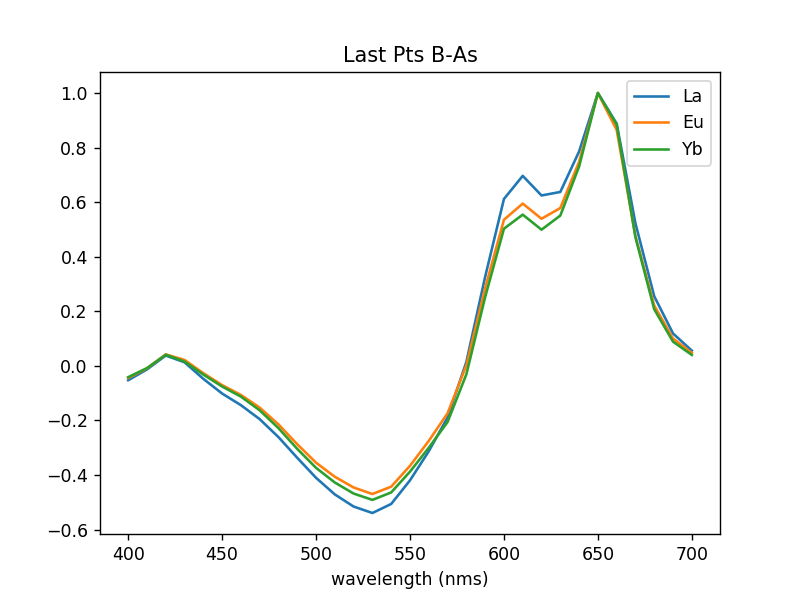

Text(0.5,0,'wavelength (nms)')

In [14]:
# plots final B-As for each
wells_add = all_wells_adds[1]



plt.figure()
r = 8
c = 4
valsLa = wells_add[(r,c)] - wells_add[(1,1)]
valsLa = valsLa / valsLa[(650 - nm_start) // nm_step]
valsEu = wells_add[(r,c+4)] - wells_add[(1,1)]
valsEu = valsEu / valsEu[(650 - nm_start) // nm_step]
valsYb = wells_add[(r,c+8)] - wells_add[(1,1)]
valsYb = valsYb / valsYb[(650 - nm_start) // nm_step]
    
plt.plot(nms, valsLa)
plt.plot(nms, valsEu)
plt.plot(nms, valsYb)
plt.legend(rees)
plt.title('Last Pts B-As')
plt.xlabel('wavelength (nms)')

[6.40000000e-04 3.23386361e-02 2.69441225e-01 1.65000000e+01]


C:\Users\seanm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


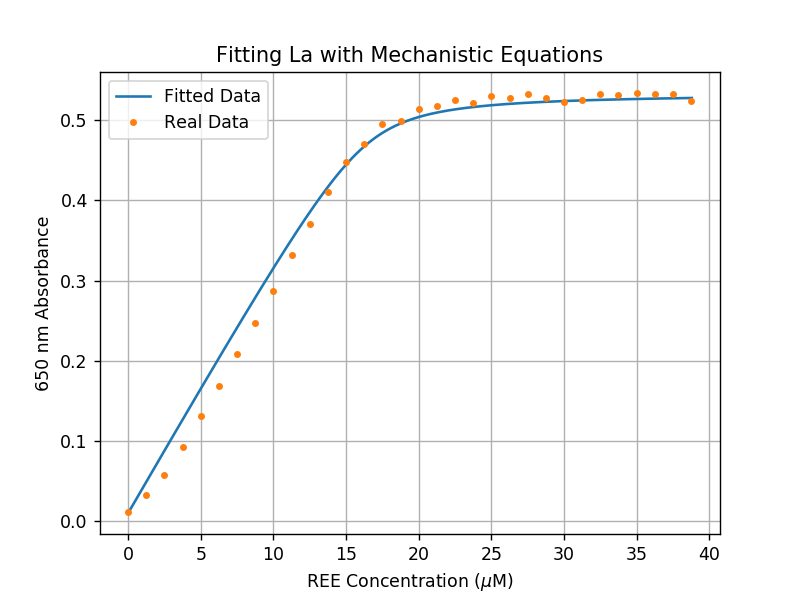

<IPython.core.display.Javascript object>


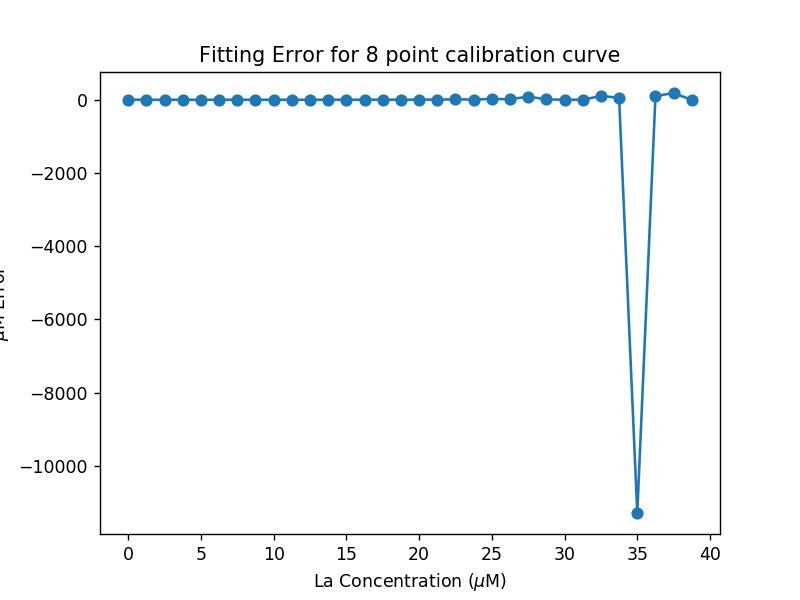

[6.24000000e-04 3.59465663e-02 5.05862458e-02 1.62852504e+01]


<IPython.core.display.Javascript object>


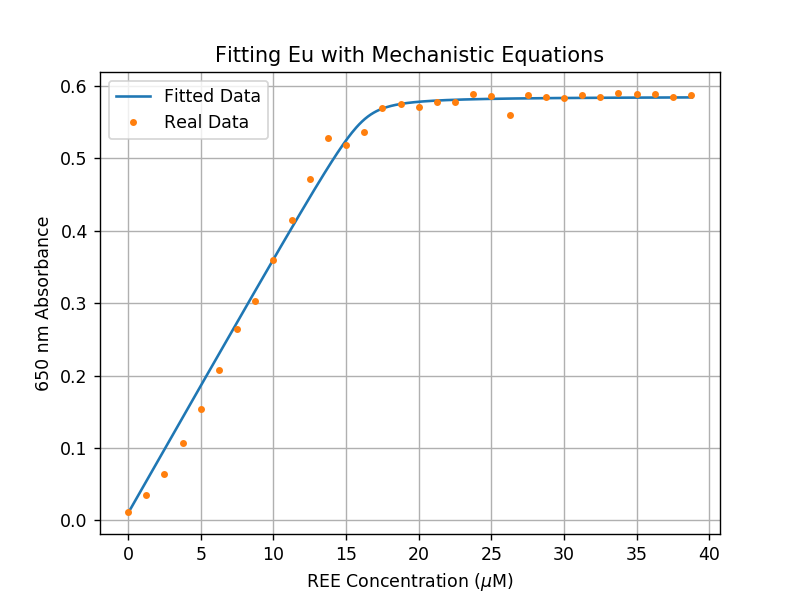

<IPython.core.display.Javascript object>


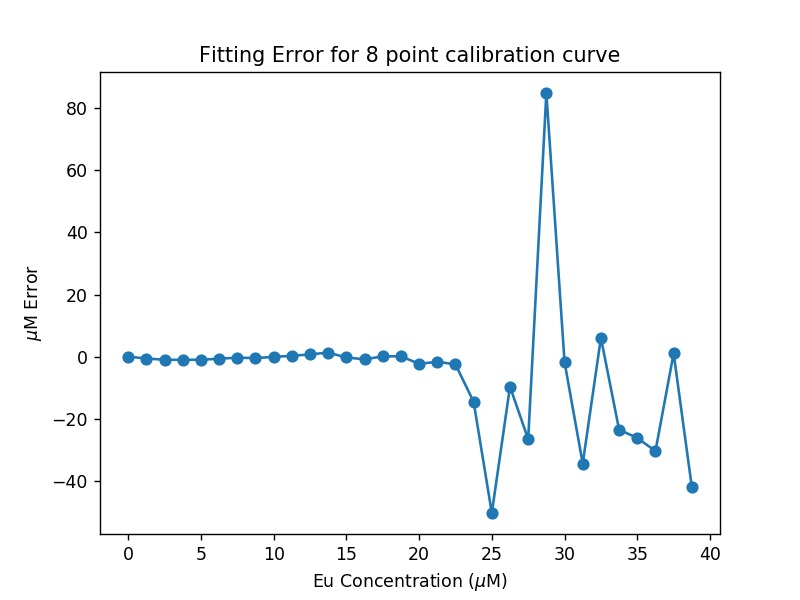

[6.77333333e-04 3.48578365e-02 1.13252022e+00 1.65000000e+01]


<IPython.core.display.Javascript object>


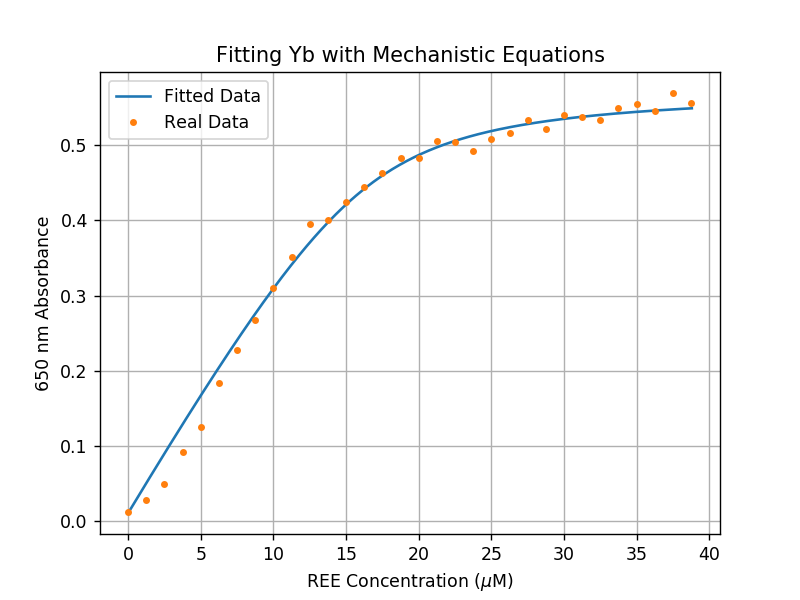

<IPython.core.display.Javascript object>


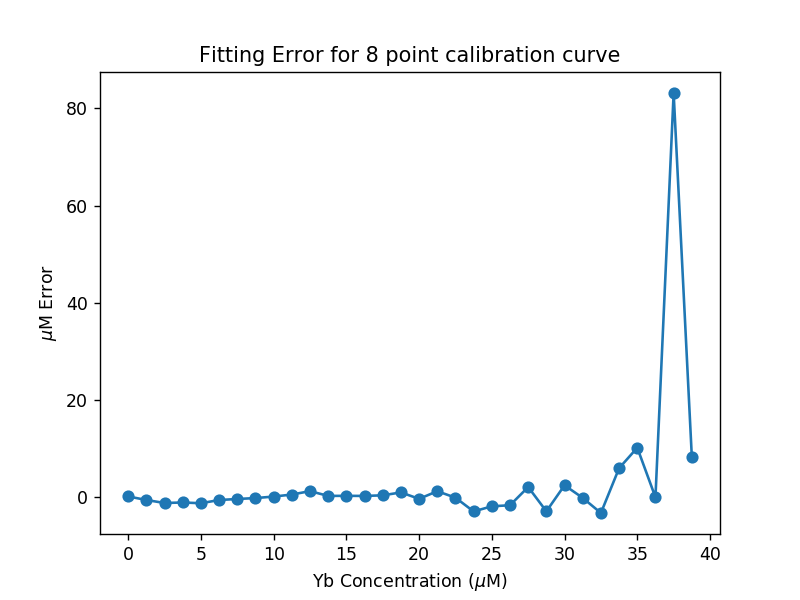

In [15]:
# uses mechanistic equations to fit data (only 650 nm)

# fits using mechanistic equations

# assumes dye concentration is close to correct
lim = 32
for j in range(3):
    abses650 = []
    mean_vals = []
    std_vals = []
    for_fitting = []
    wells_add = all_wells_adds[1]
    for i in range(len(la_concs[:lim])):
        r = i % 8 + 1
        c= i // 8 + 1
        abses650.append(wells_add[(r,c+j*4)][(650 - nm_start) // nm_step])

    dye_conc = 15
    p0 = get_p0_guess_1(la_concs[:lim], abses650, dye_conc)
    bounds = get_bounds_1(la_concs[:lim], abses650, dye_conc)
    popt,pcov = curve_fit(get_absorbance_1fit, la_concs[:lim], abses650, p0=p0, bounds=bounds)
    print(popt)

    plotting_concs = np.arange(0,38.9,0.1)
    plotting_abses = get_absorbance_1(plotting_concs, popt)

    fitted_vals = get_ree_conc_1(abses650, popt)

    plt.figure()
    plt.rcParams['pdf.fonttype'] = 42
    plt.xlabel('REE Concentration ($\mu$M)')
    plt.ylabel('650 nm Absorbance')
    plt.plot(plotting_concs, plotting_abses)
    plt.plot(la_concs[:lim], abses650, '.')
    plt.legend(['Fitted Data', 'Real Data',]) #'real data used for fitting'])
    plt.title('Fitting ' + rees[j] + ' with Mechanistic Equations')
    plt.grid()
    
    if j == 0:
        plt.savefig('la_mech_fit.pdf')
    if j == 2:
        plt.savefig('yb_mech_fit.pdf')

    plt.figure()
    plt.plot(la_concs[:lim], fitted_vals[:lim] - la_concs[:lim], '-o')
    plt.xlabel(rees[j] + ' Concentration ($\mu$M)')
    plt.ylabel('$\mu$M Error')
    plt.title('Fitting Error for 8 point calibration curve')

[6.40000000e-04 2.89075055e-02 4.39678973e-02 1.83182298e+01]


C:\Users\seanm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


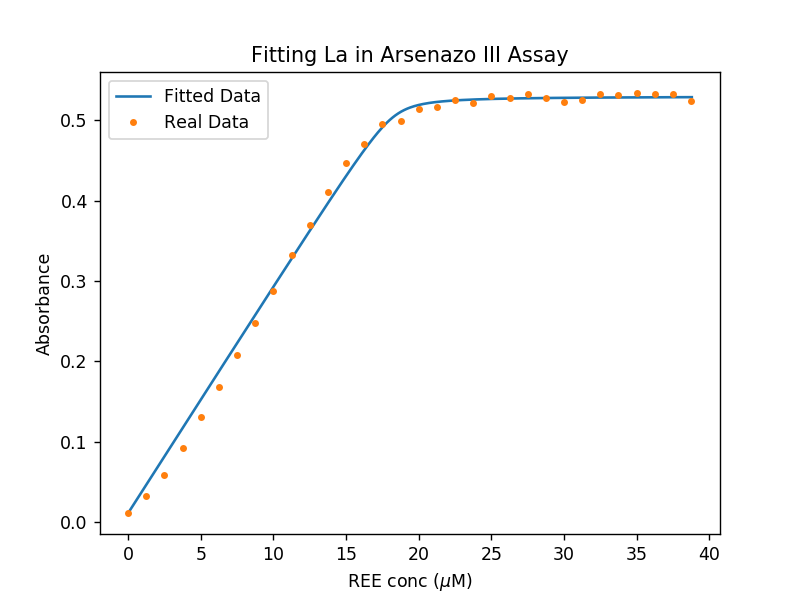

<IPython.core.display.Javascript object>


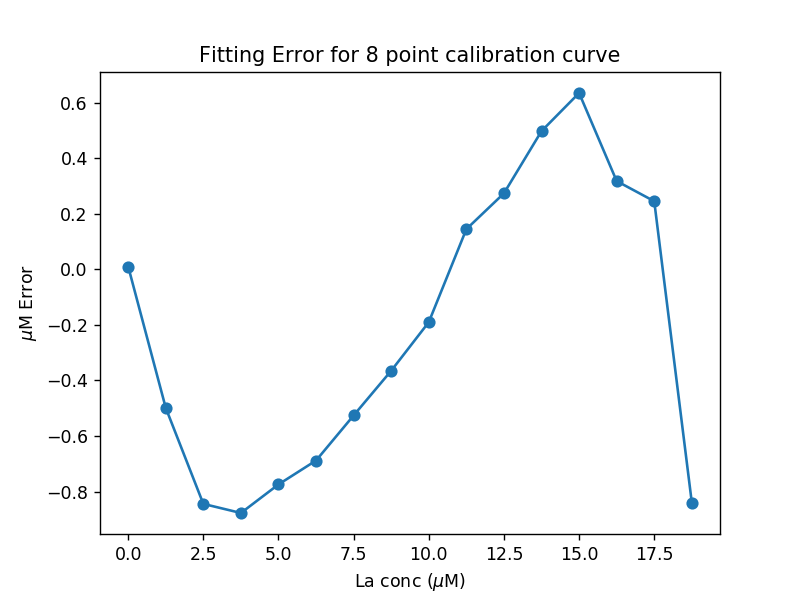

[6.24000000e-04 3.59468083e-02 5.06040732e-02 1.62851736e+01]


<IPython.core.display.Javascript object>


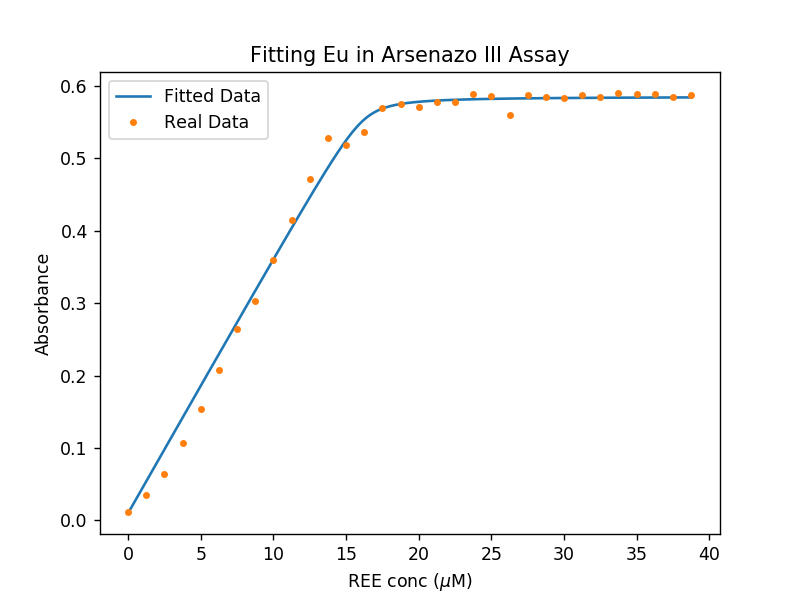

<IPython.core.display.Javascript object>


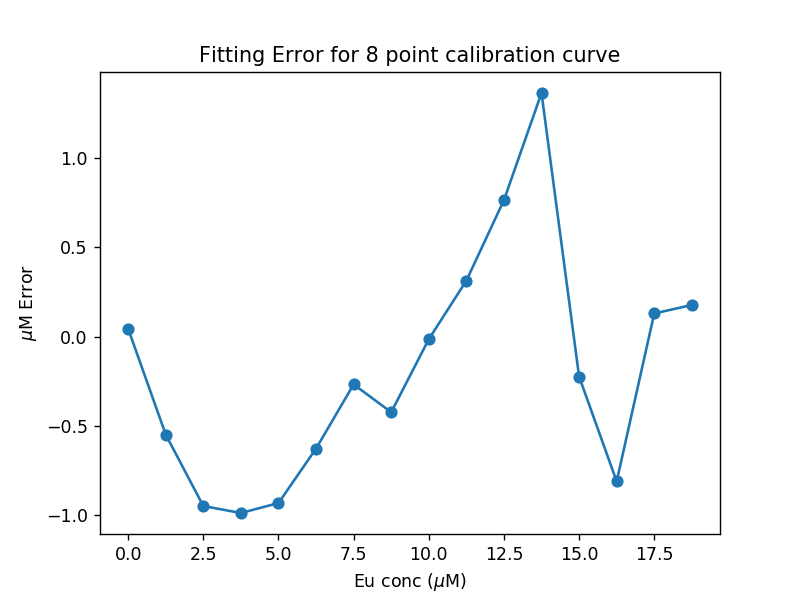

[6.77333333e-04 3.24860410e-02 7.89081460e-01 1.74444167e+01]


<IPython.core.display.Javascript object>


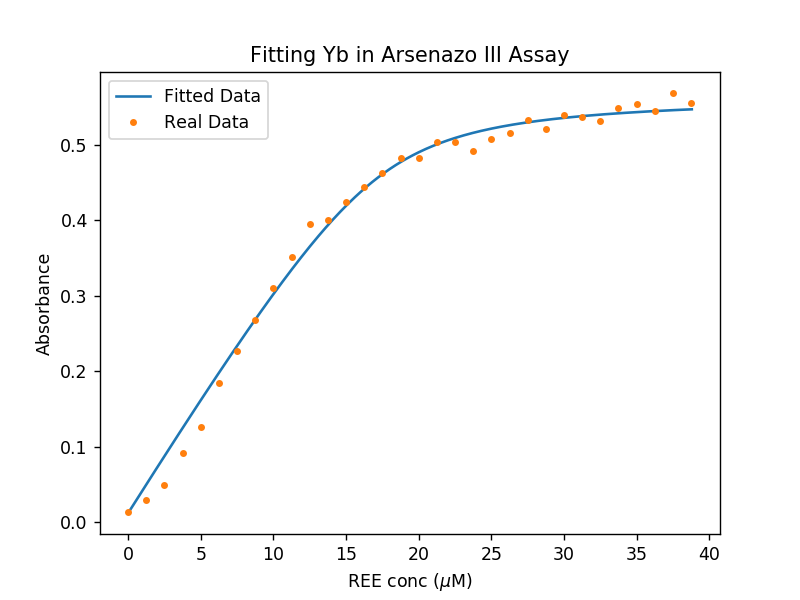

<IPython.core.display.Javascript object>


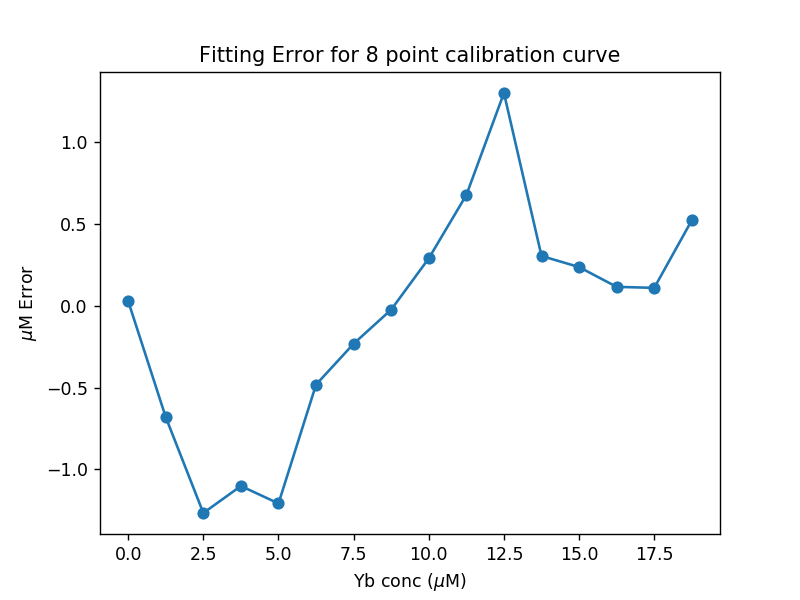

In [20]:
# uses mechanistic equations to fit data (only 650 nm)

# fits using mechanistic equations

# assumes dye concentration can be anything
for j in range(3):
    abses650 = []
    mean_vals = []
    std_vals = []
    for_fitting = []
    wells_add = all_wells_adds[1]
    for i in range(len(la_concs)):
        r = i % 8 + 1
        c= i // 8 + 1
        abses650.append(wells_add[(r,c+j*4)][(650 - nm_start) // nm_step])

    dye_conc = 15
    p0 = get_p0_guess_1(la_concs, abses650, dye_conc)
    bounds = get_bounds_1(la_concs, abses650, dye_conc)
    bounds = ((bounds[0][0], bounds[0][1], bounds[0][2], 0), (bounds[1][0], bounds[1][1], bounds[1][2], 100))
    popt,pcov = curve_fit(get_absorbance_1fit, la_concs, abses650, p0=p0, bounds=bounds)
    print(popt)

    plotting_concs = np.arange(0,38.9,0.1)
    plotting_abses = get_absorbance_1(plotting_concs, popt)

    fitted_vals = get_ree_conc_1(abses650, popt)

    plt.figure()

    plt.xlabel('REE conc ($\mu$M)')
    plt.ylabel('Absorbance')
    plt.plot(plotting_concs, plotting_abses)
    plt.plot(la_concs, abses650, '.')
    plt.legend(['Fitted Data', 'Real Data',]) #'real data used for fitting'])
    plt.title('Fitting ' + rees[j] + ' in Arsenazo III Assay')

    plt.figure()
    plt.plot(la_concs[:16], fitted_vals[:16] - la_concs[:16], '-o')
    plt.xlabel(rees[j] + ' conc ($\mu$M)')
    plt.ylabel('$\mu$M Error')
    plt.title('Fitting Error for 8 point calibration curve')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.15000000000000002, 1.25, 2.35, 3.6500000000000004, 4.95, 6.4, 7.5, 8.9, 10.0, 11.100000000000001, 12.350000000000001, 13.65, 15.15, 16.2, 18.0, 18.3]


C:\Users\seanm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


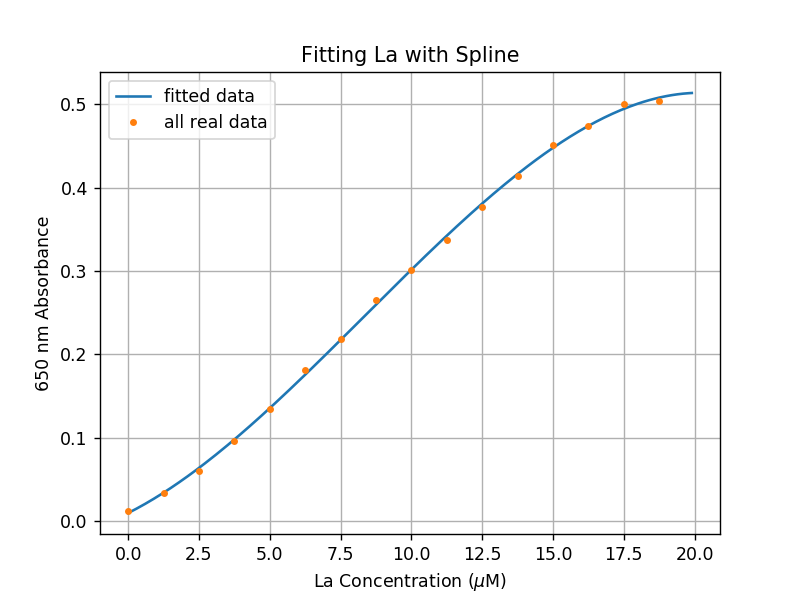

<IPython.core.display.Javascript object>


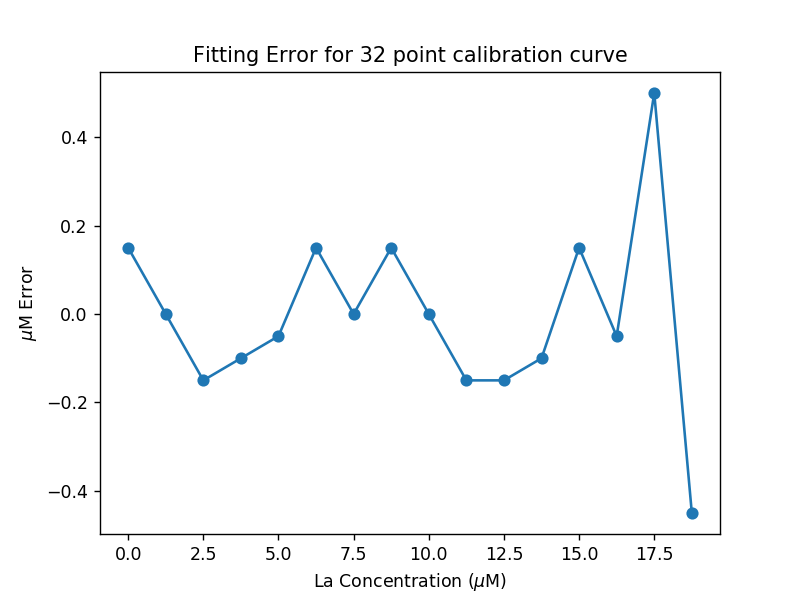

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.15000000000000002, 1.3, 2.4000000000000004, 3.7, 4.95, 6.300000000000001, 7.65, 8.6, 9.850000000000001, 11.200000000000001, 12.8, 14.8, 14.3, 15.05, 18.650000000000002, 18.05]


<IPython.core.display.Javascript object>


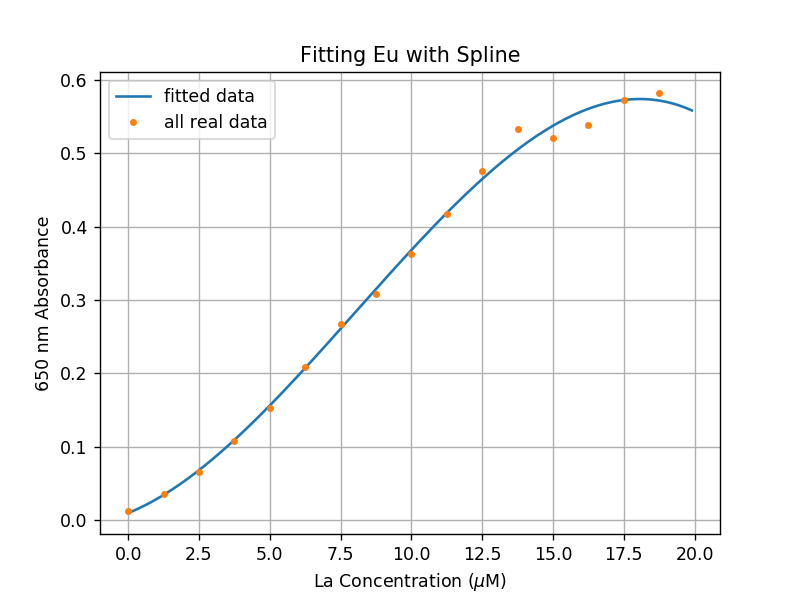

<IPython.core.display.Javascript object>


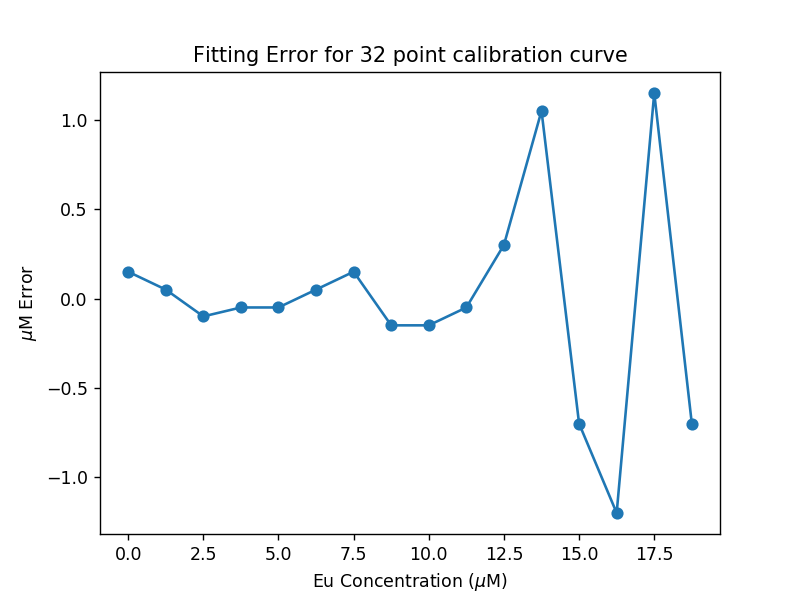

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.55, 1.2000000000000002, 2.0500000000000003, 3.5500000000000003, 4.65, 6.4, 7.65, 8.9, 10.200000000000001, 11.55, 13.100000000000001, 13.350000000000001, 14.350000000000001, 15.350000000000001, 16.6, 18.900000000000002]


<IPython.core.display.Javascript object>


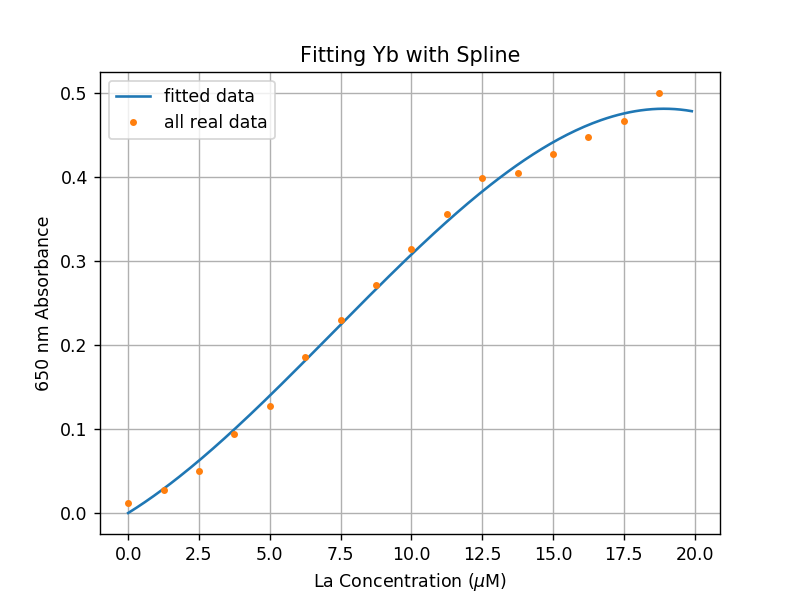

<IPython.core.display.Javascript object>


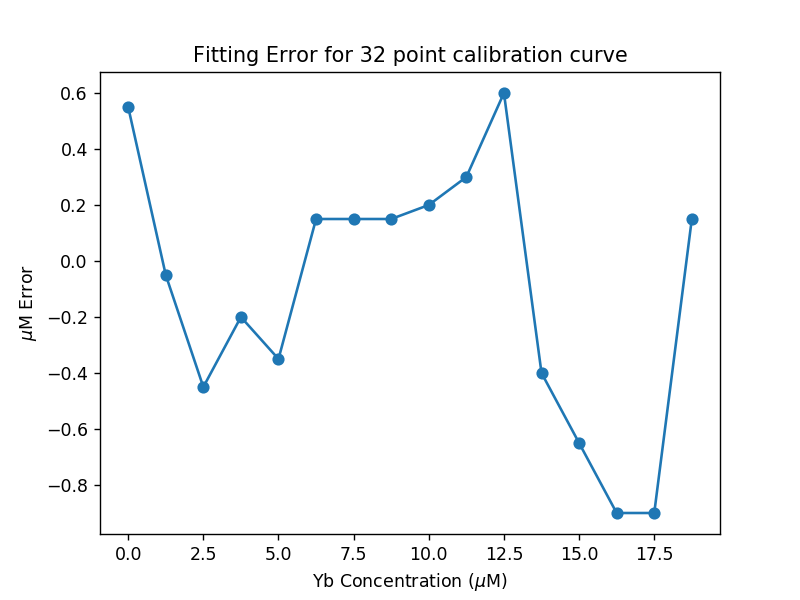

In [17]:
# use splines to fit REE data (only 650 nm)

# fits using interpolation
lim = 16
conc_lim = lim / 32 * 40
for j in range(3):
    abses = []
    abses650 = []
    all_concs = []
    for_fitting = []
    la_wells_add = all_wells_adds[0]

    for i in range(len(la_concs[:lim])):
        r = i % 8 + 1
        c= i // 8 + 1
        vals = []
        vals.append(la_wells_add[(r,c + 4*j)][(650 - nm_start) // nm_step])
        if la_concs[i] in [0,2.5,5,10,15,20,30,38.75] or True:
            all_concs.append(la_concs[i])
            abses.append(la_wells_add[(r,c + 4*j)])
            abses650.append(la_wells_add[(r,c+4*j)][(650 - nm_start) // nm_step])
        if la_concs[i] in [0,2.5,5,10,15,20,30,38.75] or True:
            for_fitting.append(i)
    print(for_fitting)

    splines,weights = get_spline_n(all_concs, abses, np.array([(650 - nm_start) // nm_step]), grain=400)
    maps = get_spline_n_map(splines, 0, conc_lim, 0.05)

    plotting_concs = np.arange(0,conc_lim,0.1)
    plotting_abses = []
    for i in range(len(plotting_concs)):
        plotting_abses.append(splines[0](plotting_concs[i]))

    fitted_vals = []
    for i in range(len(abses650)):
        fitted_vals.append(get_ree_from_spline_n_fast(splines, weights, [abses650[i]], 0, conc_lim, 0.05, maps))
    print(fitted_vals)
    to_plot_mean = []
    to_plot_fitted = []
    for i in range(len(for_fitting)):
        to_plot_mean.append(abses650[for_fitting[i]])
        to_plot_fitted.append(fitted_vals[for_fitting[i]])

    plt.figure()
    plt.rcParams['pdf.fonttype'] = 42
    plt.xlabel('La Concentration ($\mu$M)')
    plt.ylabel('650 nm Absorbance')
    plt.plot(plotting_concs, plotting_abses)
    plt.plot(la_concs[:lim], abses650, '.')
    #plt.errorbar([0,2.5,5,10,15,20,30,38.75],to_plot_mean,to_plot_std, fmt='.r')
    plt.legend(['Fitted Data', 'Real Data'])#,'real data used for fitting'])
    plt.title('Fitting ' + rees[j] + ' with Spline')
    plt.grid()
    
    if j == 0:
        plt.savefig('la_cal_spline.pdf')
    if j == 2:
        plt.savefig('yb_cal_spline.pdf')

    plt.figure()
    plt.plot(la_concs[:lim], fitted_vals - la_concs[:lim], '-o')
    #plt.plot([0,2.5,5,10,15,20,30,38.75], to_plot_fitted - np.array([0,2.5,5,10,15,20,30,38.75]), 'ro')
    plt.xlabel(rees[j] + ' Concentration ($\mu$M)')
    plt.ylabel('$\mu$M Error')
    plt.title('Fitting Error for 32 point calibration curve')

C:\Users\seanm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


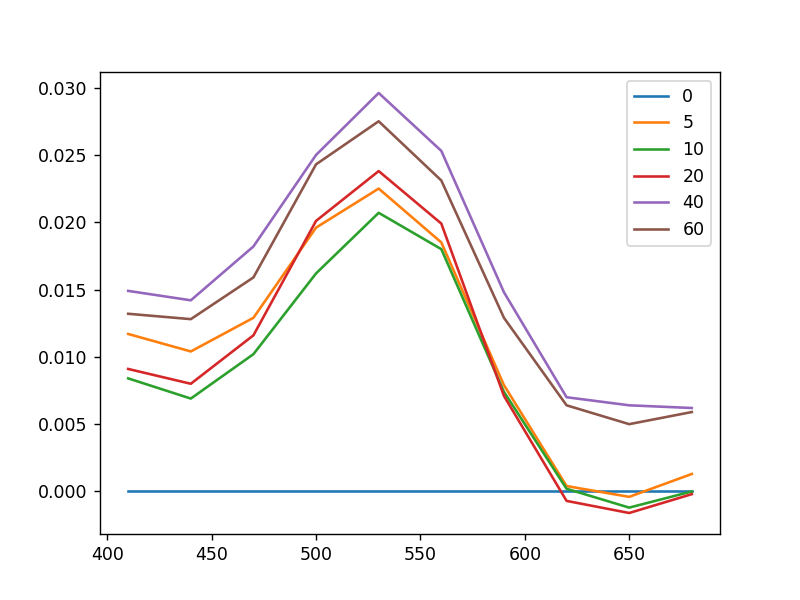

<IPython.core.display.Javascript object>


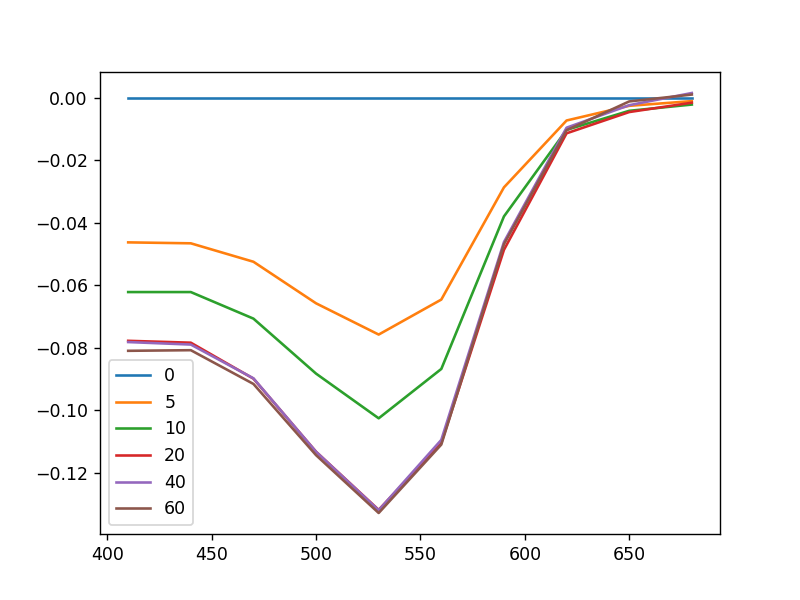

In [45]:
# plots nulls over shake and time

plt.figure()
for j in range(len(all_wells_light_adds)):   
    vals = np.zeros(len(nms))
    for i in range(3):
        vals += all_wells_light_adds[j][(1,1 + 4*i)] - all_wells_light_adds[0][(1,1+4*i)]
    plt.plot(nms,vals)
plt.legend(list(map(str,times)))

plt.figure()
for j in range(len(all_wells_light_adds)):   
    vals = np.zeros(len(nms))
    for i in range(3):
        vals += all_wells_shake_adds[j][(1,1 + 4*i)] - all_wells_shake_adds[0][(1,1+4*i)]
    plt.plot(nms,vals)
plt.legend(list(map(str,times)))

<IPython.core.display.Javascript object>


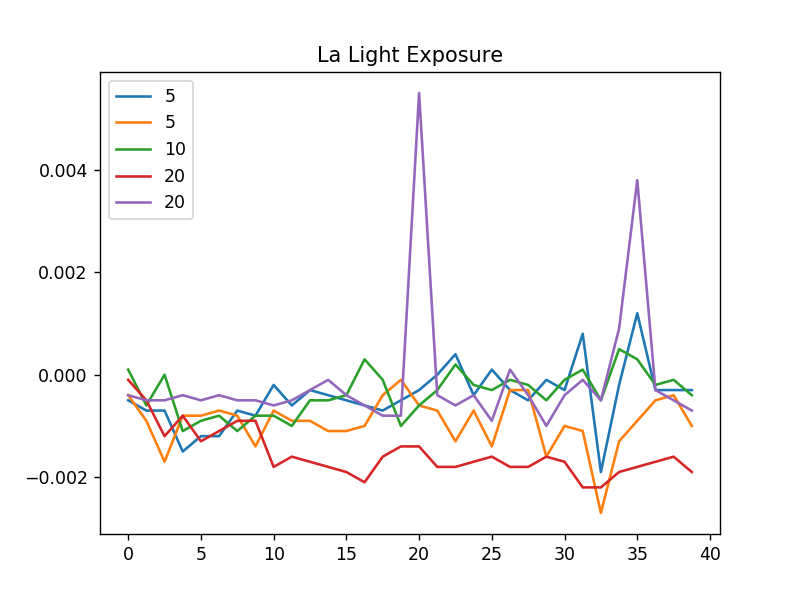

<IPython.core.display.Javascript object>


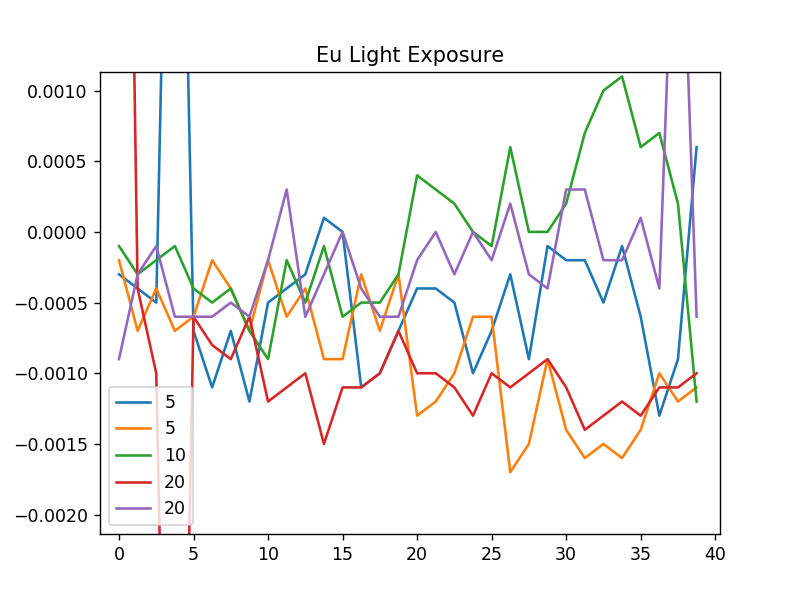

<IPython.core.display.Javascript object>


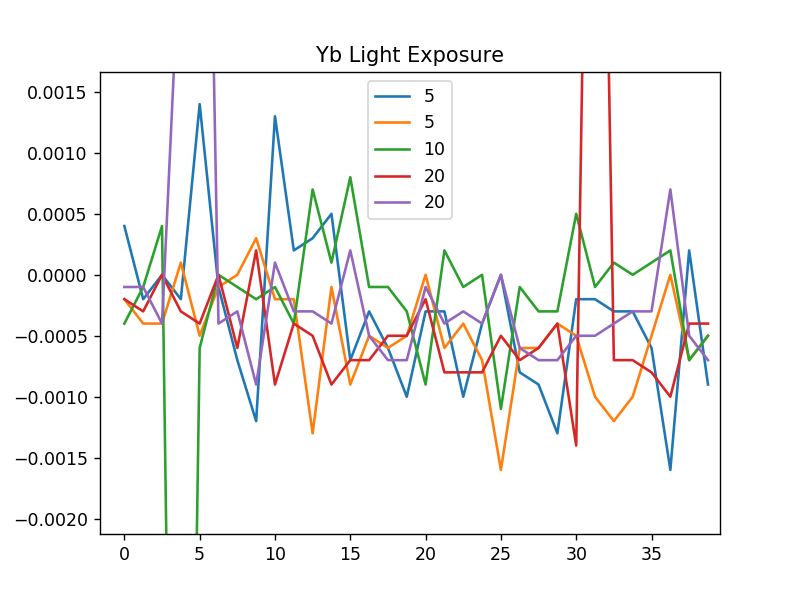

<IPython.core.display.Javascript object>


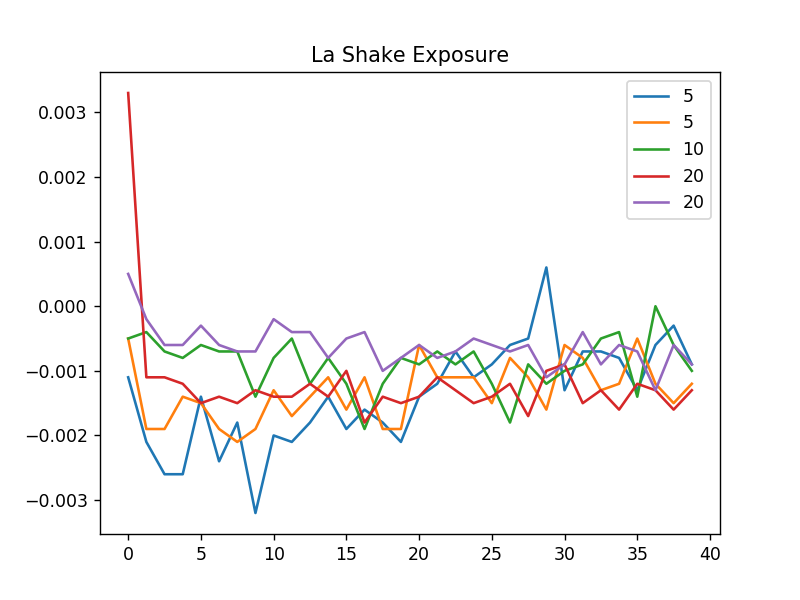

<IPython.core.display.Javascript object>


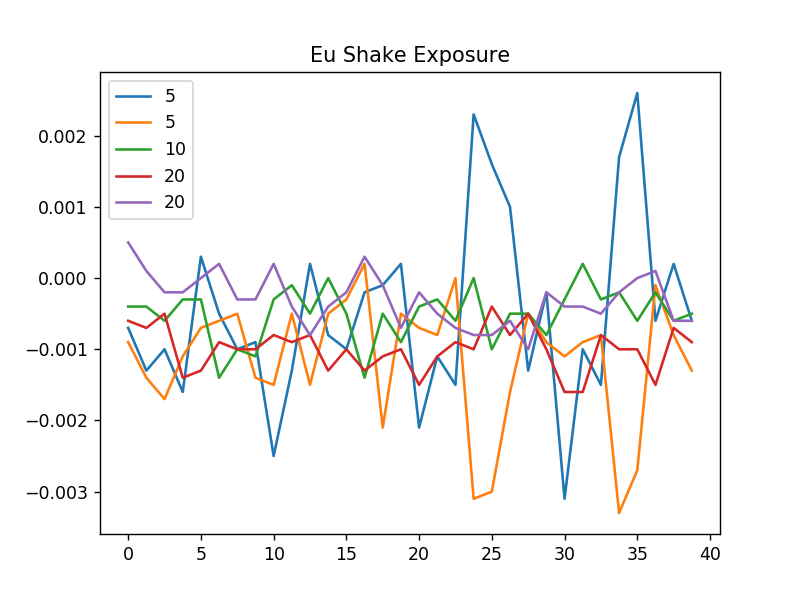

<IPython.core.display.Javascript object>


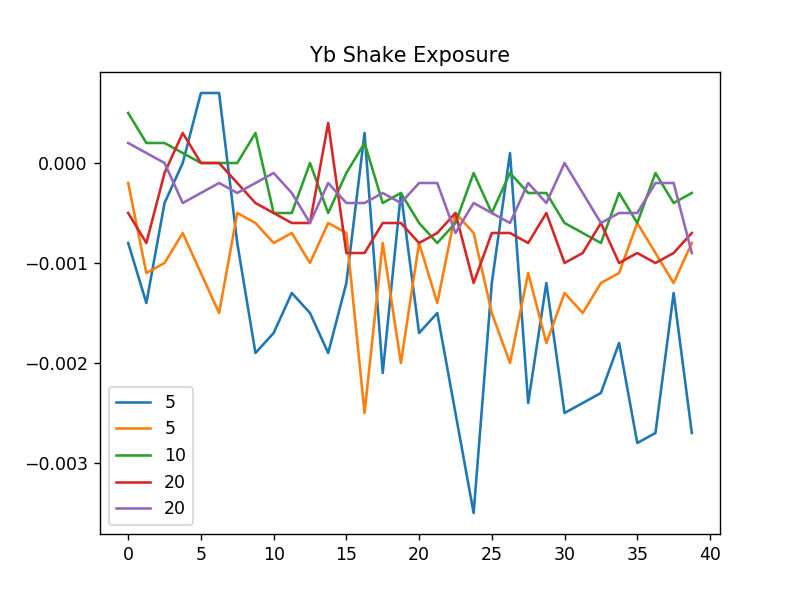

In [25]:
# plots diff absorbance vs REE for a particular wavelength for all times

la_concs = np.arange(0,40,1.25)
wave = (650 - nm_start) // nm_step
for j in range(3):
    plt.figure()
    for k in range(len(all_wells_light_adds)-1):
        wells_add = all_wells_light_adds[k]
        wells_add2 = all_wells_light_adds[k+1]
        abses = []
        for i in range(len(la_concs)):
            r = i % 8 + 1
            c= i // 8 + 1
            abses.append(wells_add2[(r,c + 4*j)][wave] - wells_add[(r,c + 4*j)][wave])
        plt.plot(la_concs, abses)
    plt.legend(np.array(times[1:]) - np.array(times[:len(times)-1]))
    plt.title(rees[j] + ' Light Exposure')

for j in range(3):
    plt.figure()
    for k in range(len(all_wells_shake_adds)-1):
        wells_add = all_wells_shake_adds[k]
        wells_add2 = all_wells_shake_adds[k+1]
        abses = []
        for i in range(len(la_concs)):
            r = i % 8 + 1
            c= i // 8 + 1
            abses.append(wells_add2[(r,c + 4*j)][wave] - wells_add[(r,c + 4*j)][wave])
        plt.plot(la_concs, abses)
    plt.legend(np.array(times[1:]) - np.array(times[:len(times)-1]))
    plt.title(rees[j] + ' Shake Exposure')

<IPython.core.display.Javascript object>


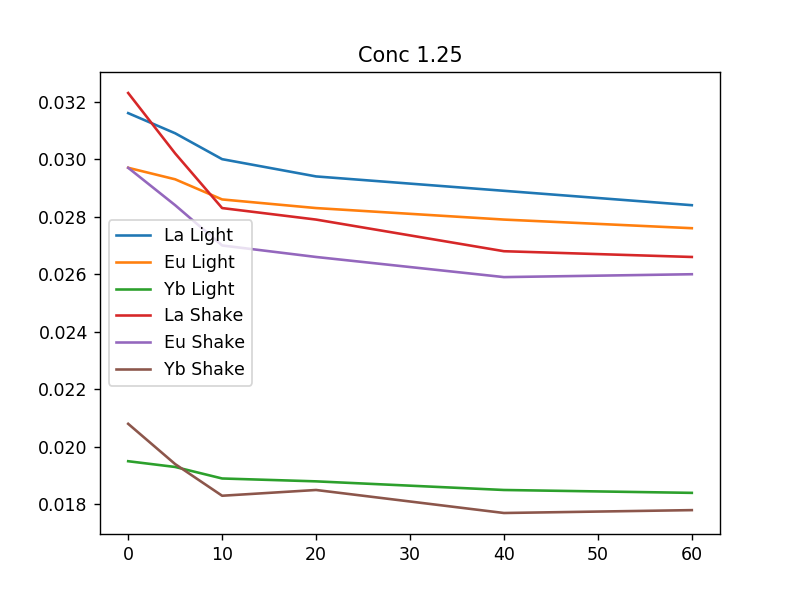

Text(0.5,1,'Conc 1.25')

In [20]:
# plots how absorbance changes over time for a given REE

labels = []
for i in range(len(rees)):
    labels.append(rees[i] + ' Light')
for i in range(len(rees)):
    labels.append(rees[i] + ' Shake')

ree_idx = 1
wave = (650 - nm_start) // nm_step
plt.figure()
for j in range(3):
    vals = []
    for wells_add in all_wells_light_adds:
        r = ree_idx % 8 + 1
        c= ree_idx // 8 + 1
        vals.append(wells_add[(r,c + 4*j)][wave])
    plt.plot(times, vals)
for j in range(3):
    vals = []
    for wells_add in all_wells_shake_adds:
        r = ree_idx % 8 + 1
        c= ree_idx // 8 + 1
        vals.append(wells_add[(r,c + 4*j)][wave])
    plt.plot(times, vals)
plt.legend(labels)
plt.title('Conc ' + str(la_concs[ree_idx]))


<IPython.core.display.Javascript object>


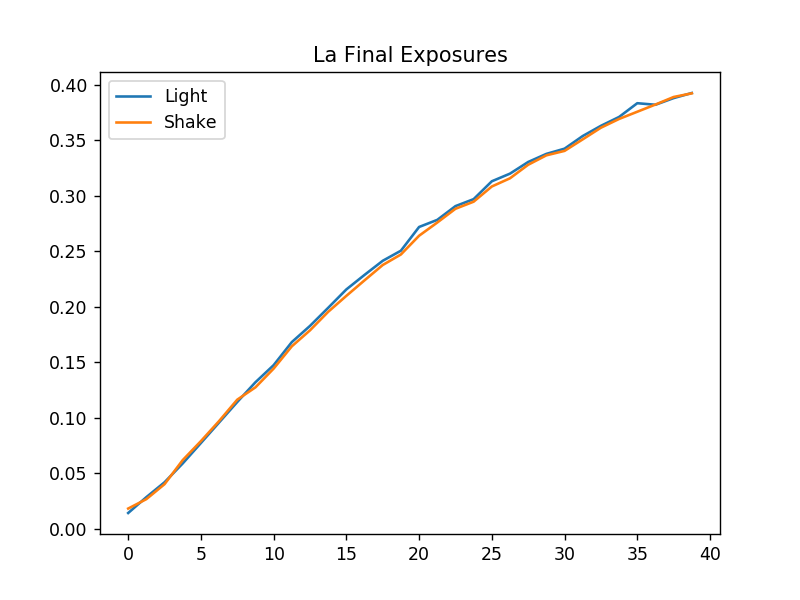

<IPython.core.display.Javascript object>


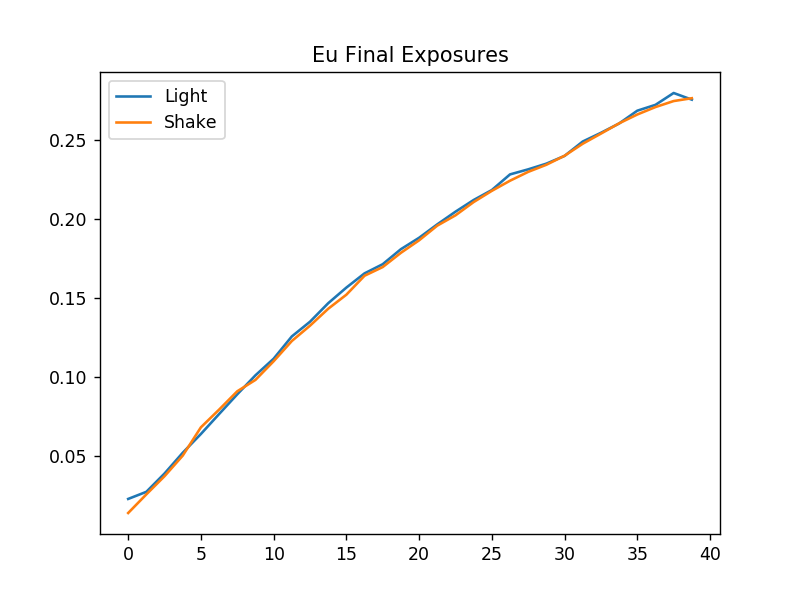

<IPython.core.display.Javascript object>


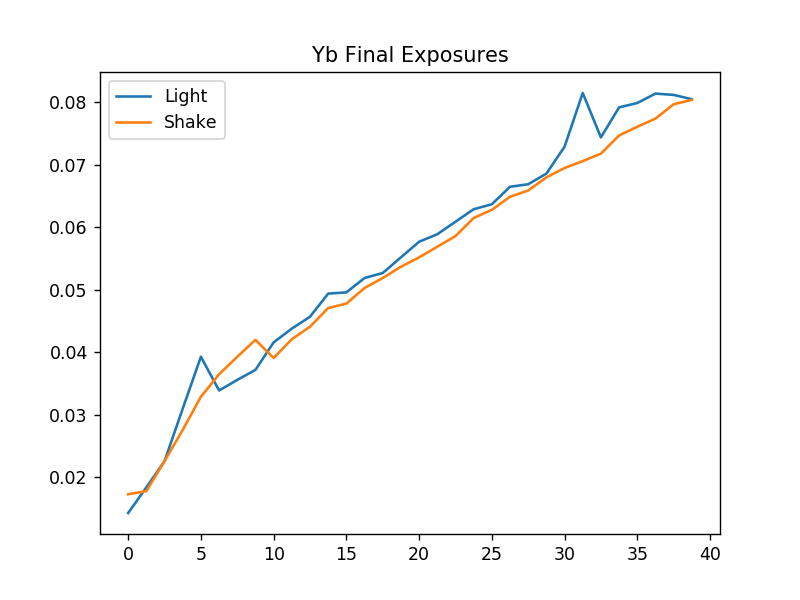

In [32]:
# comapres final shake and light

la_concs = np.arange(0,40,1.25)
wave = (650 - nm_start) // nm_step
for j in range(3):
    plt.figure()
    wells_add = all_wells_light_adds[-1]
    abses = []
    for i in range(len(la_concs)):
        r = i % 8 + 1
        c= i // 8 + 1
        abses.append(wells_add[(r,c + 4*j)][wave])
    plt.plot(la_concs, abses)
    
    wells_add = all_wells_shake_adds[-1]
    abses = []
    for i in range(len(la_concs)):
        r = i % 8 + 1
        c= i // 8 + 1
        abses.append(wells_add[(r,c + 4*j)][wave])
    plt.plot(la_concs, abses)
    plt.legend(['Light','Shake'])
    plt.title(rees[j] + ' Final Exposures')

<IPython.core.display.Javascript object>


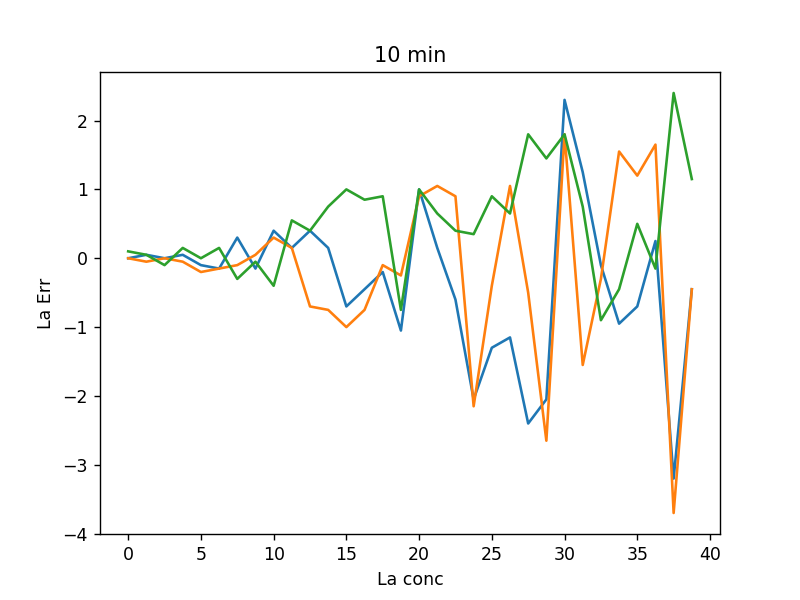

0.7562499999999993
0.8249999999999997
0.6812500000000006


<IPython.core.display.Javascript object>


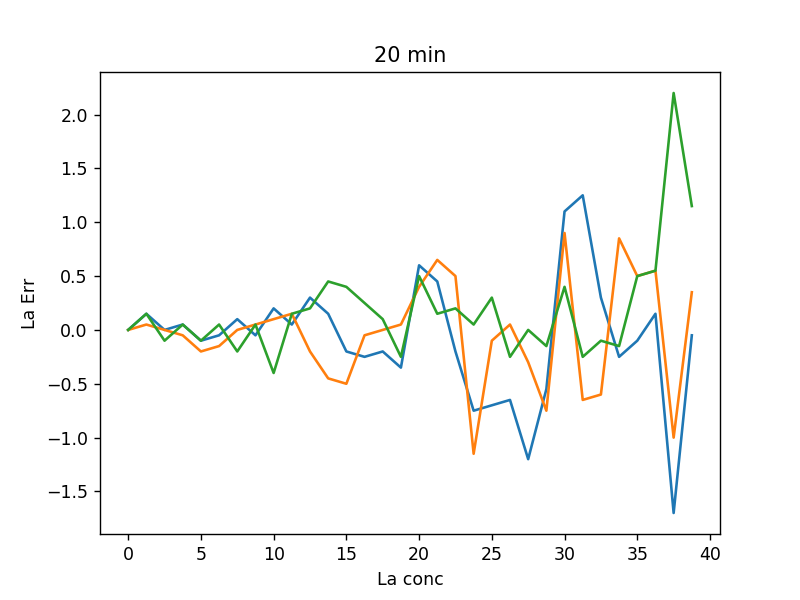

0.38124999999999987
0.35312500000000013
0.30625000000000074


<IPython.core.display.Javascript object>

0.2468750000000003
0.20625000000000024
0.33437499999999964


In [7]:
# makes best fit and plots errors for each data set

la_concs = np.arange(0,40,1.25)
nms_used = np.arange((530 - nm_start) // nm_step, (650 - nm_start) // nm_step)
labels = ['10 min', '20 min', '30 min']
idx = 0
for la_wells_add in all_la_wells_adds:
    abses = []
    for i in range(len(la_concs)):
        r = i % 8 + 1
        c= i // 8 + 1
        abses.append((la_wells_add[(r,c)] + la_wells_add[(r,c+4)] + la_wells_add[(r,c+8)]) / 3)

    splines,weights = get_spline_n(la_concs, abses, nms_used, grain=400)
    maps = get_spline_n_map(splines, 0, 40, 0.1)
    
    la_est1 = np.zeros(len(la_concs))
    la_est2 = np.zeros(len(la_concs))
    la_est3 = np.zeros(len(la_concs))

    for i in range(len(la_concs)):
        r = i % 8 + 1
        c = i // 8 + 1
        la_est1[i] = get_ree_from_spline_n_fast(splines, weights, la_wells_add[(r,c)][nms_used], 0, 40, 0.1, maps)
        la_est2[i] = get_ree_from_spline_n_fast(splines, weights, la_wells_add[(r,c + 4)][nms_used], 0, 40, 0.1, maps)
        la_est3[i] = get_ree_from_spline_n_fast(splines, weights, la_wells_add[(r,c + 8)][nms_used], 0, 40, 0.1, maps)
        
    plt.figure()
    plt.plot(la_concs, la_est1 - la_concs)
    print(np.mean(np.abs(la_est1 - la_concs)))
    plt.plot(la_concs, la_est2 - la_concs)
    print(np.mean(np.abs(la_est2 - la_concs)))
    plt.plot(la_concs, la_est3 - la_concs)
    print(np.mean(np.abs(la_est3 - la_concs)))
    plt.xlabel('La conc')
    plt.ylabel('La Err')
    plt.title(labels[idx])
    idx += 1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[0.4, 1.5, 2.35, 3.5500000000000003, 4.75, 6.0, 7.25, 8.55, 9.950000000000001, 11.3, 12.600000000000001, 13.9, 15.15, 16.45, 17.6, 18.75, 20.400000000000002, 21.700000000000003, 22.75, 23.650000000000002, 25.0, 25.900000000000002, 26.950000000000003, 28.0, 30.0, 31.150000000000002, 32.45, 33.75, 35.2, 36.5, 38.300000000000004, 38.45]


<IPython.core.display.Javascript object>


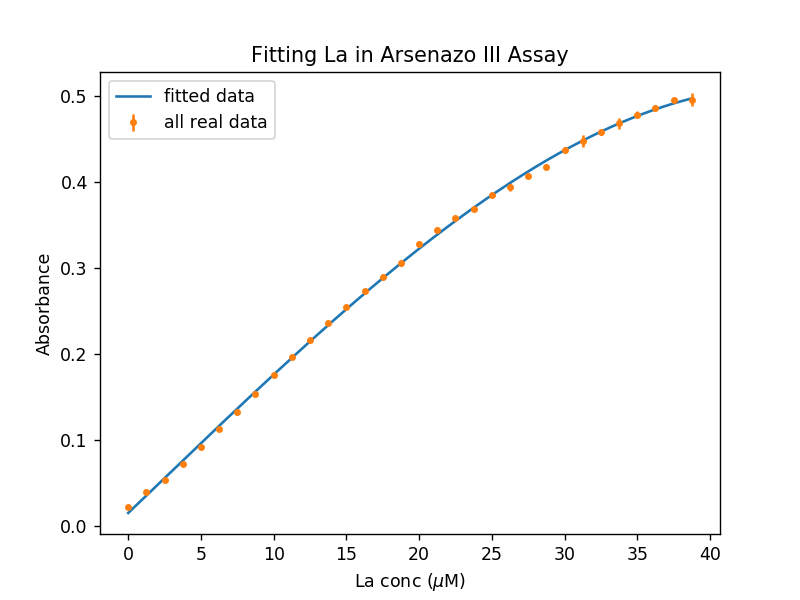

<IPython.core.display.Javascript object>


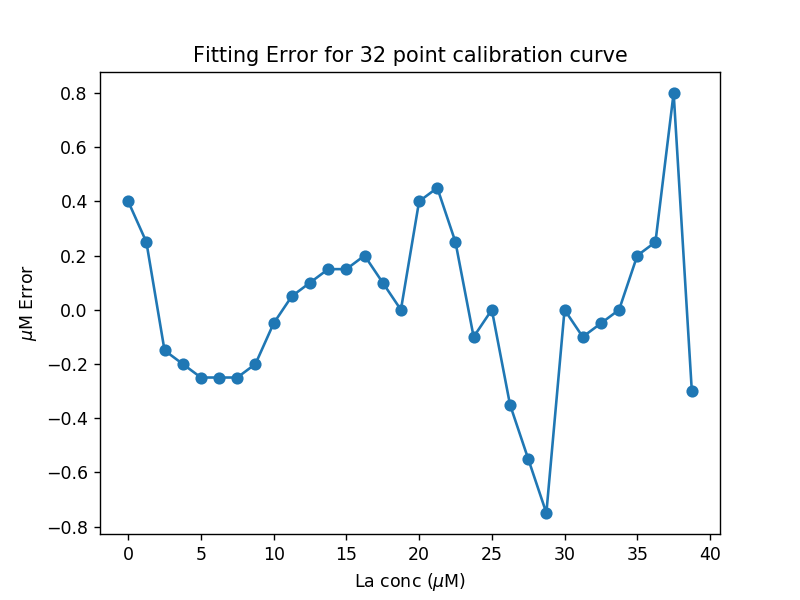

Text(0.5,1,'Fitting Error for 32 point calibration curve')

In [92]:
# fits using interpolation

abses = []
abses650 = []
all_concs = []
mean_vals = []
std_vals = []
for_fitting = []
la_wells_add = all_la_wells_adds[2]

for i in range(len(la_concs)):
    r = i % 8 + 1
    c= i // 8 + 1
    vals = []
    for j in range(3):
        vals.append(la_wells_add[(r,c + 4*j)][(650 - nm_start) // nm_step])
        if la_concs[i] in [0,2.5,5,10,15,20,30,38.75] or True:
            all_concs.append(la_concs[i])
            abses.append(la_wells_add[(r,c + 4*j)])
            abses650.append(la_wells_add[(r,c+4*j)][(650 - nm_start) // nm_step])
    if la_concs[i] in [0,2.5,5,10,15,20,30,38.75] or True:
        for_fitting.append(i)
    mean_vals.append(np.mean(vals))
    std_vals.append(np.std(vals))
print(for_fitting)

splines,weights = get_spline_n(all_concs, abses, np.array([(650 - nm_start) // nm_step]), grain=400)
maps = get_spline_n_map(splines, 0, 40, 0.05)

plotting_concs = np.arange(0,38.8,0.1)
plotting_abses = []
for i in range(len(plotting_concs)):
    plotting_abses.append(splines[0](plotting_concs[i]))

fitted_vals = []
for i in range(len(mean_vals)):
    fitted_vals.append(get_ree_from_spline_n_fast(splines, weights, [mean_vals[i]], 0, 40, 0.05, maps))
print(fitted_vals)
to_plot_mean = []
to_plot_std = []
to_plot_fitted = []
for i in range(len(for_fitting)):
    to_plot_mean.append(mean_vals[for_fitting[i]])
    to_plot_std.append(std_vals[for_fitting[i]])
    to_plot_fitted.append(fitted_vals[for_fitting[i]])

plt.figure()

plt.xlabel('La conc ($\mu$M)')
plt.ylabel('Absorbance')
plt.plot(plotting_concs, plotting_abses)
plt.errorbar(la_concs, mean_vals, std_vals, fmt='.')
#plt.errorbar([0,2.5,5,10,15,20,30,38.75],to_plot_mean,to_plot_std, fmt='.r')
plt.legend(['fitted data', 'all real data'])#,'real data used for fitting'])
plt.title('Fitting La in Arsenazo III Assay')

plt.figure()
plt.plot(la_concs, fitted_vals - la_concs, '-o')
#plt.plot([0,2.5,5,10,15,20,30,38.75], to_plot_fitted - np.array([0,2.5,5,10,15,20,30,38.75]), 'ro')
plt.xlabel('La conc ($\mu$M)')
plt.ylabel('$\mu$M Error')
plt.title('Fitting Error for 32 point calibration curve')

[0, 2, 4, 8, 12, 16, 24, 31]


<IPython.core.display.Javascript object>


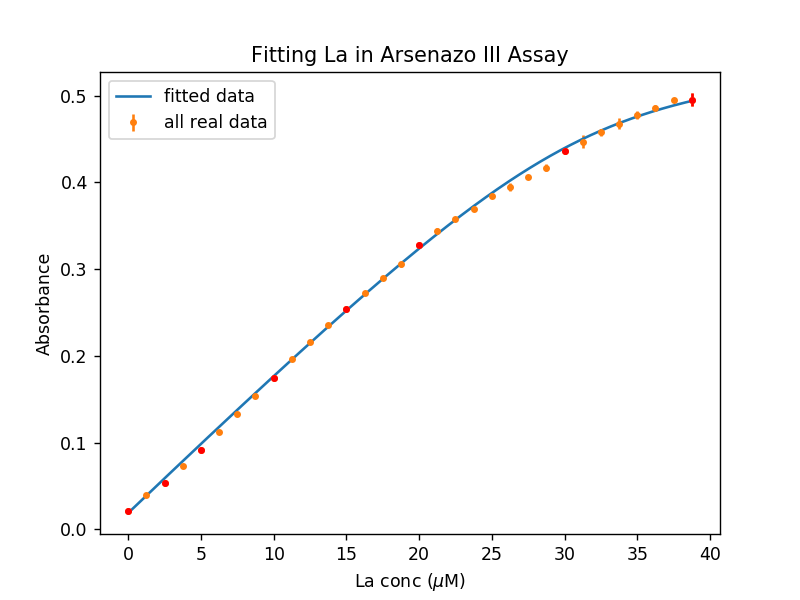

<IPython.core.display.Javascript object>


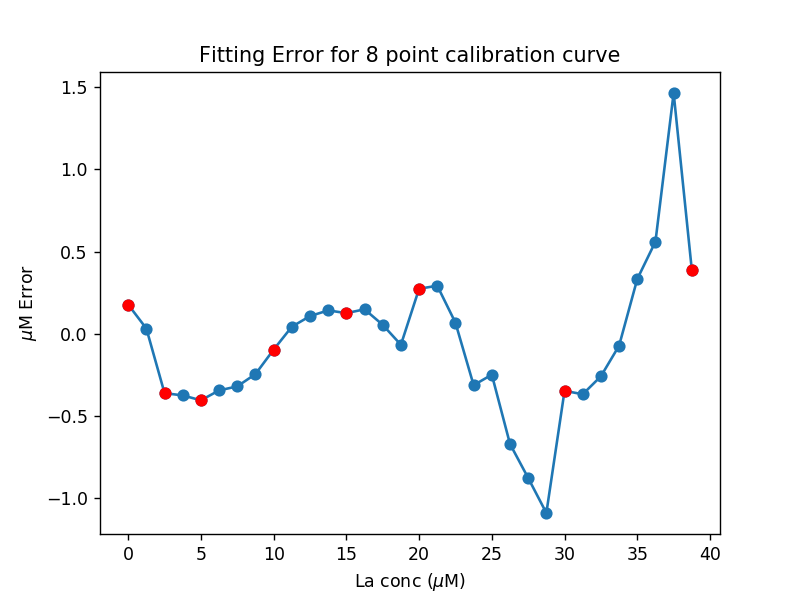

Text(0.5,1,'Fitting Error for 8 point calibration curve')

In [80]:
# fits using equations

abses650 = []
all_concs = []
mean_vals = []
std_vals = []
for_fitting = []
la_wells_add = all_la_wells_adds[2]
for i in range(len(la_concs)):
    r = i % 8 + 1
    c= i // 8 + 1
    vals = []
    for j in range(3):
        vals.append(la_wells_add[(r,c + 4*j)][(650 - nm_start) // nm_step])
        if la_concs[i] in [0,2.5,5,10,15,20,30,38.75]:
            all_concs.append(la_concs[i])
            abses650.append(la_wells_add[(r,c + 4*j)][(650 - nm_start) // nm_step])
    if la_concs[i] in [0,2.5,5,10,15,20,30,38.75]:
        for_fitting.append(i)
    mean_vals.append(np.mean(vals))
    std_vals.append(np.std(vals))
print(for_fitting)
dye_conc = 30
p0 = get_p0_guess_1(all_concs, abses650, dye_conc)
bounds = get_bounds_1(all_concs, abses650, dye_conc)
popt,pcov = curve_fit(get_absorbance_1fit, all_concs, abses650, p0=p0, bounds=bounds)

plotting_concs = np.arange(0,38.8,0.1)
plotting_abses = get_absorbance_1(plotting_concs, popt)

fitted_vals = get_ree_conc_1(mean_vals, popt)
to_plot_mean = []
to_plot_std = []
to_plot_fitted = []
for i in range(len(for_fitting)):
    to_plot_mean.append(mean_vals[for_fitting[i]])
    to_plot_std.append(std_vals[for_fitting[i]])
    to_plot_fitted.append(fitted_vals[for_fitting[i]])

plt.figure()

plt.xlabel('La conc ($\mu$M)')
plt.ylabel('Absorbance')
plt.plot(plotting_concs, plotting_abses)
plt.errorbar(la_concs, mean_vals, std_vals, fmt='.')
plt.errorbar([0,2.5,5,10,15,20,30,38.75],to_plot_mean,to_plot_std, fmt='.r')
plt.legend(['fitted data', 'all real data',]) #'real data used for fitting'])
plt.title('Fitting La in Arsenazo III Assay')

plt.figure()
plt.plot(la_concs, fitted_vals - la_concs, '-o')
plt.plot([0,2.5,5,10,15,20,30,38.75], to_plot_fitted - np.array([0,2.5,5,10,15,20,30,38.75]), 'ro')
plt.xlabel('La conc ($\mu$M)')
plt.ylabel('$\mu$M Error')
plt.title('Fitting Error for 8 point calibration curve')

<IPython.core.display.Javascript object>


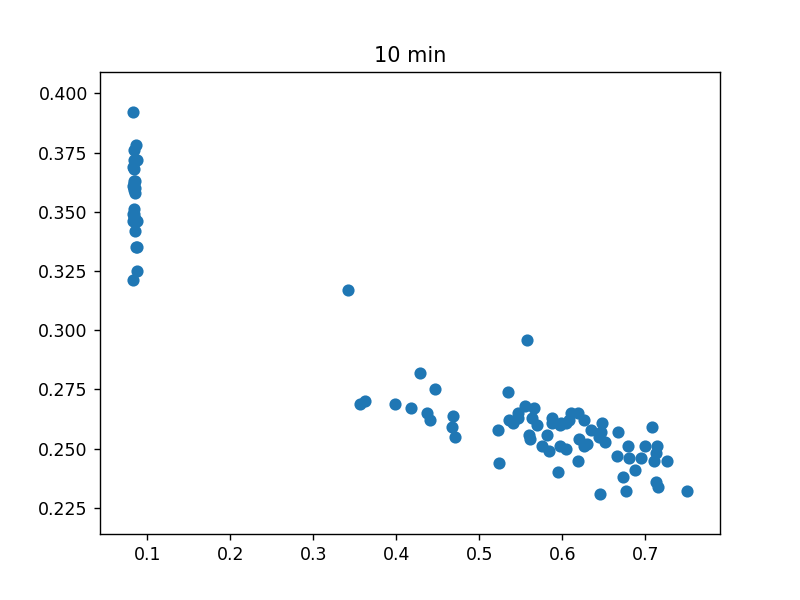

0.047013793364214455


<IPython.core.display.Javascript object>


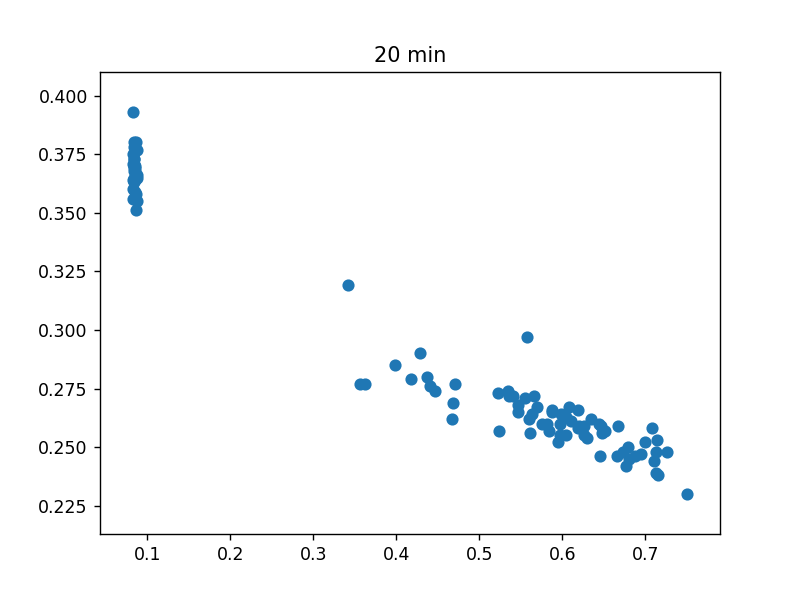

0.05006591900344706


<IPython.core.display.Javascript object>


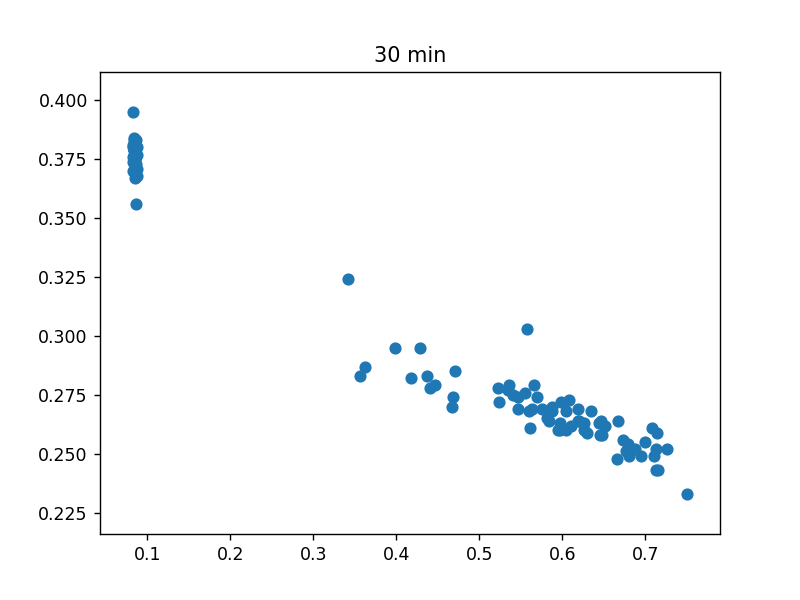

0.05123972521495569


In [7]:
# plots just absorbance data
labels = ['10 min', '20 min', '30 min']
idx = 0
for wells_add in all_wells_adds:

    all_bacs = []
    all_ods = []

    for well in wells_add:
        r = well[0]
        c = well[1]
        ab = wells_add[well][(650 - nm_start) // nm_step]

        all_bacs.append(ab)
        all_ods.append(wells_ods[well][0])
    
    plt.figure()
    plt.scatter(all_ods, all_bacs)
    print(np.std(all_bacs))
    plt.title(labels[idx])
    idx += 1

<IPython.core.display.Javascript object>


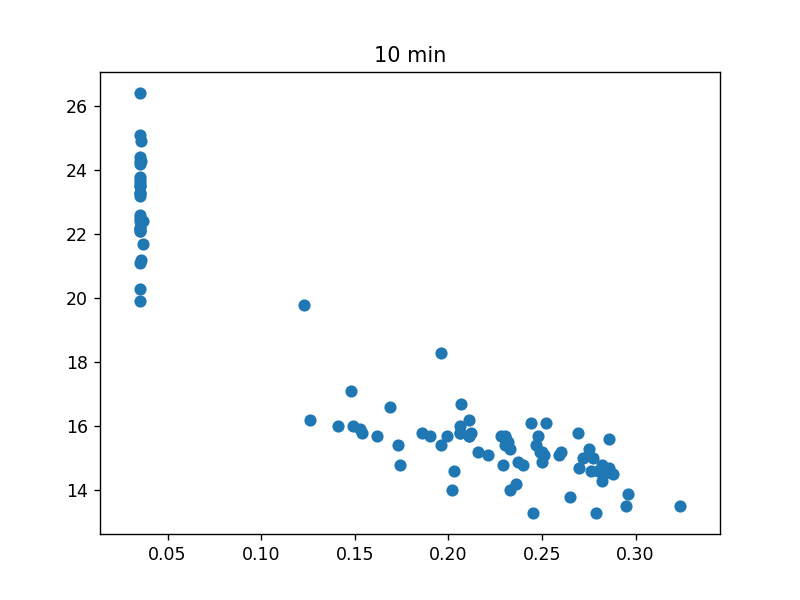

3.686904377508168


<IPython.core.display.Javascript object>


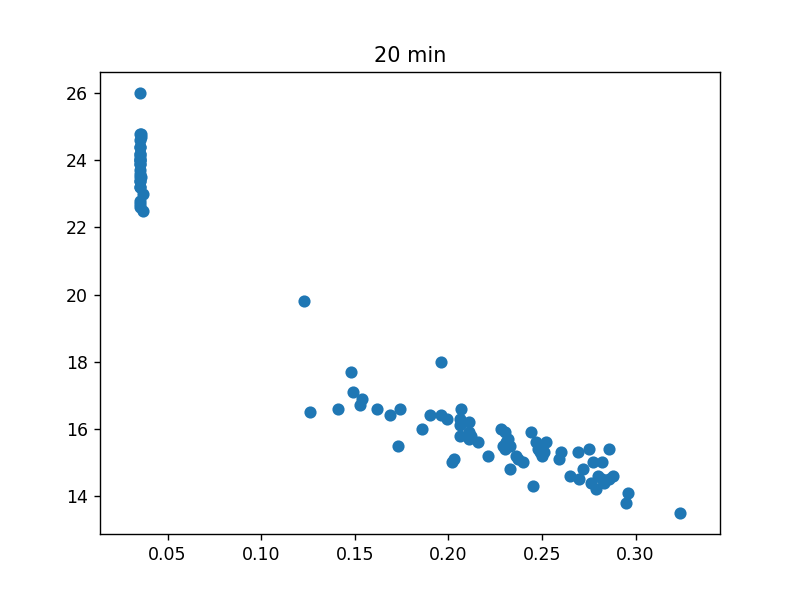

3.8646533854836913


<IPython.core.display.Javascript object>


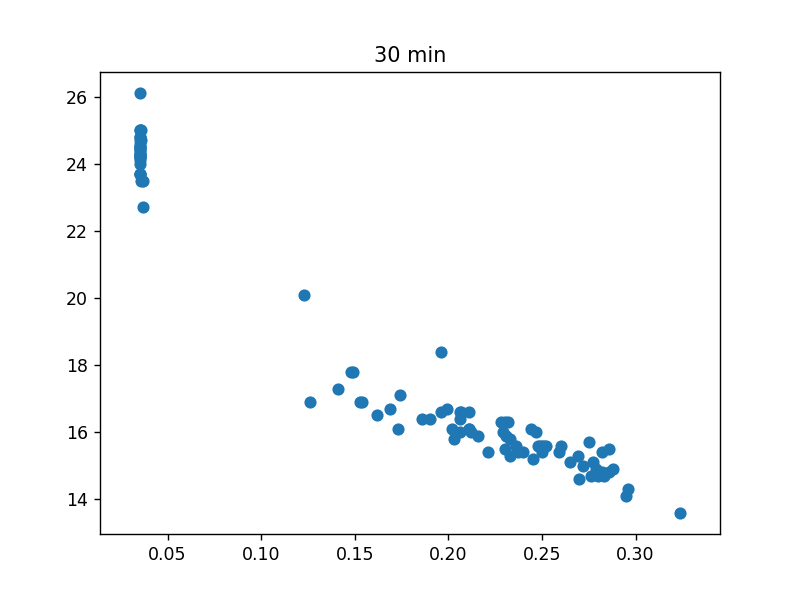

3.9443457630212757


In [9]:
# plots just absorbance data
labels = ['10 min', '20 min','30 min']
idx = 0
small = 0
big = 40
step = 0.1

for wells_add in all_wells_adds:

    all_bacs = []
    all_ods = []

    for well in wells_add:
        r = well[0]
        c = well[1]
        abses = wells_add[well][nms_used]
        la_est = get_ree_from_spline_n_fast(splines, weights, abses, small, big, step, maps)

        all_bacs.append(la_est)
        all_ods.append(wells_ods2[well][0])
    
    plt.figure()
    plt.scatter(all_ods, all_bacs)
    print(np.std(all_bacs))
    plt.title(labels[idx])
    idx += 1

<IPython.core.display.Javascript object>


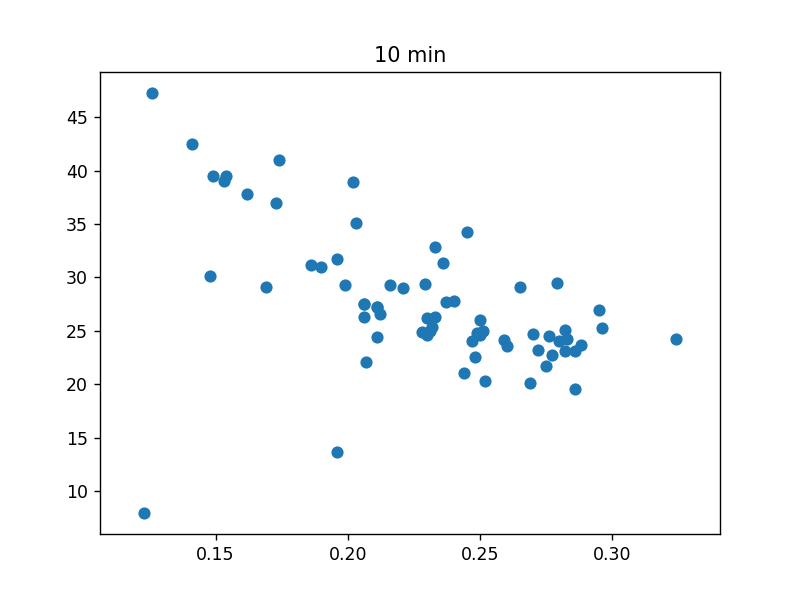

6.522102766440662


<IPython.core.display.Javascript object>


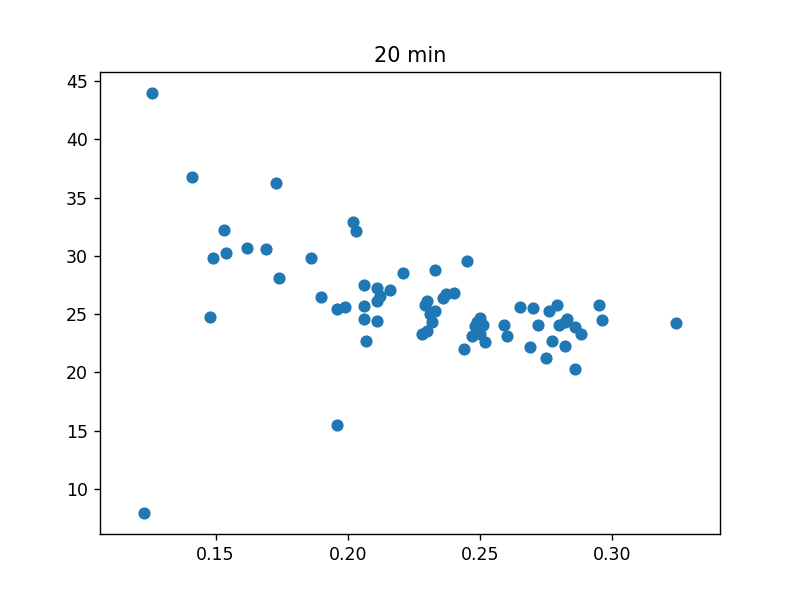

4.627437563550747


<IPython.core.display.Javascript object>


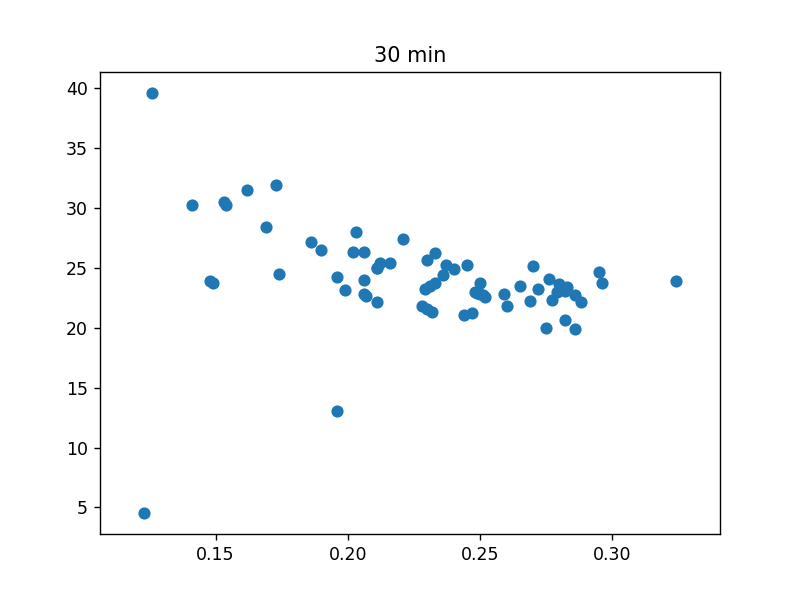

4.1779632085628


In [8]:
# plots just absorbance data normalized by OD
labels = ['10 min', '20 min','30 min']
idx = 0
small = 0
big = 40
step = 0.1

for wells_add in all_wells_adds:

    all_bacs = []
    all_ods = []

    for well in wells_add:
        r = well[0]
        c = well[1]
        abses = wells_add[well][nms_used]
        la_est = get_ree_from_spline_n_fast(splines, weights, abses, small, big, step, maps)
        if wells_ods2[well][0] > .05:
            all_bacs.append((20.5 - la_est) / (wells_ods2[well][0] - .035))
            all_ods.append(wells_ods2[well][0])
    
    plt.figure()
    plt.scatter(all_ods, all_bacs)
    print(np.std(all_bacs))
    plt.title(labels[idx])
    idx += 1

In [ ]:
plt.figure()
plt.scatter(ods,las)
plt.xlabel('OD')
plt.ylabel('La')
plt.title('La remaining vs OD')

plt.figure()
plt.scatter(blanks650, las)
plt.xlabel('Blank')
plt.ylabel('La')
plt.title('La remaining vs blank')

blank_od = 0
num_blanks = 0
for i in range(len(ods)):
    if ods[i] < 0.12:
        num_blanks += 1
        blank_od += ods[i]
blank_od /= num_blanks

la_adjust = []
ods_adjust = []
la_no_blank = []
ods_no_blank = []

for i in range(len(las)):
    if ods[i] > 0.12:
        la_adjust.append((23 - las[i]) / (ods[i] - blank_od))
        ods_adjust.append(ods[i] - blank_od)
        la_no_blank.append(las[i])
        ods_no_blank.append(ods[i])

plt.figure()
plt.scatter(ods_adjust, la_adjust)
plt.xlabel('Adjusted OD')
plt.ylabel('Adjusted La')
print(np.corrcoef(ods_adjust,la_adjust))

print('no blank, no adjust corr')
print(np.corrcoef(ods_no_blank,la_no_blank))

In [ ]:
plt.figure()
plt.hist(las,50)
plt.title('La distribution')

plt.figure()
plt.hist(la_adjust,50)
plt.title('Adjusted La distribution')

In [10]:
# imports excel knockout data 

file_name = 'shewanella_knockout_info.xlsx'
collection = xlrd.open_workbook(file_name)
sheet = collection.sheet_by_index(0)
plates = {}
num_rows = sheet.nrows
for row in range(2,num_rows):
    plate_num = sheet.cell_value(row,0)
    well_val = sheet.cell_value(row,1)
    feature = sheet.cell_value(row,11)
    if plate_num not in plates:
        plates[plate_num] = {}
    plates[plate_num][well_val] = feature
    

In [11]:
# summarizes data in excel sheet
avg_blank = 0
num_blanks = 0
for well in wells_ods2:
    if wells_ods2[well][0] < 0.05:
        num_blanks += 1
        avg_blank += wells_ods2[well][0]
avg_blank /= num_blanks

with open('data_summary_plate5_sat.csv', 'w', newline='') as csvfile:
    la_start = 24 # slope fit...kind of cheating
    plate_num = 5
    
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['well','feature','La Adsorbed', 'OD', 'La Adsorbed / Adjusted OD', 'Blank'])
    for well in all_wells_adds[-1]:
        well_val = chr(64 + well[0]) + str(well[1]).zfill(2)
        feature = plates[plate_num][well_val]
        abses = all_wells_adds[-1][well][nms_used]
        la_est = get_ree_from_spline_n_fast(splines, weights, abses, small, big, step, maps)
        if wells_ods2[well][0] > 0.05:
            
            la_adsorbed = la_start - la_est
            writer.writerow([well_val, feature, str(la_adsorbed), wells_ods2[well][0], 
                             la_adsorbed / (wells_ods2[well][0] - avg_blank), wells_blanks[well][(650 - nm_start) // nm_step]])
        else:
            writer.writerow([well_val, feature, 0, wells_ods2[well][0], 0])


In [ ]:
# conducted same assay for same plate twice

first_set = {}
second_set = {}

with open('data_summary_plate25_regrowth.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if row[0] == 'well':
            continue
        first_set[row[0]] = (float(row[2]), float(row[3]), float(row[4]))

with open('data_summary_plate25_bm20.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if row[0] == 'well':
            continue
        second_set[row[0]] = (float(row[2]), float(row[3]), float(row[4]))

first_las = []
second_las = []
for well in first_set:
    if first_set[well][1] > 0.2 and second_set[well][1] > 0.2:
        first_las.append(first_set[well][2])
        second_las.append(second_set[well][2])

plt.figure()
plt.scatter(first_las, second_las)
#plt.plot(np.arange(20,40),np.arange(20,40))
plt.plot(np.arange(5,12),np.arange(5,12))
plt.xlabel('first')
plt.ylabel('second')
print(np.corrcoef(first_las,second_las))

In [ ]:
# compares different assays for the same plate

first_set = {}
second_set = {}

with open('data_summary_plate25_mes20.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if row[0] == 'well':
            continue
        first_set[row[0]] = (float(row[2]), float(row[3]), float(row[4]))

with open('data_summary_plate25_bm20.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if row[0] == 'well':
            continue
        second_set[row[0]] = (float(row[2]), float(row[3]), float(row[4]))

first_las = []
second_las = []
for well in first_set:
    if first_set[well][2] > 0.5 and second_set[well][2] > 0.5:
        first_las.append(first_set[well][2])
        second_las.append(second_set[well][2])

plt.figure()
plt.scatter(first_las, second_las)
plt.xlabel('first')
plt.ylabel('second')
print(np.corrcoef(first_las,second_las))